In [1]:
#!git clone https://github.com/qwerty29544/superresolution_nn.git

Cloning into 'superresolution_nn'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 68 (delta 24), reused 47 (delta 7), pack-reused 0
Unpacking objects: 100% (68/68), 11.74 MiB | 6.37 MiB/s, done.


In [33]:
#!mv /content/superresolution_nn/ipynb/model_params model_params

# Решение задачи сверхразрешения с применением нейронной сети

### Введение
Одно из главных направлений развития информационно-телекоммуникационных и радиотехнических систем заключается в повышении их информативности. Важным шагом в этом направлении является улучшение точности угловых измерений и эффективной угловой разрешающей способности с использованием новых методов цифровой обработки сигналов.

Радиолокационные системы (РЛС), основанные на цифровых антенных решетках (ЦАР), преобразуют сигналы в цифровую форму и обрабатывают их с помощью специальных алгоритмов. ЦАР способны анализировать и обрабатывать гораздо больше информации, содержащейся в структуре принимаемого сигнала, чем обычные антенны. В результате возможно достижение разрешающей способности, превышающей предел, определенный критерием Рэлея - сверхразрешение.

Угловое разрешение, основанное на критерии Рэлея, может быть выражено следующим образом:

$$
    \delta \theta \approx \lambda\ /\ D, \quad  (1)
$$

где $D$ - линейный размер антенны, $\lambda$ - длина волны, которая соответствует ширине диаграммы направленности (ДН) до половинной мощности.

Из-за важности задачи повышения углового разрешения во многих странах разрабатываются и внедряются методы цифровой обработки сигналов, которые позволяют превысить (1) и достигать сверхразрешения. \[1-6\]


### Постановка задачи
Принятый ЦАР при сканировании сектора обзора сигнал $U(\alpha)$ можеть быть выражен в виде линейного интегрального преобразования:

\begin{equation}
U(\alpha) = \int \limits_{\Omega}^{} F(\alpha - \varphi) I(\varphi) d\varphi,     \quad (2)
\end{equation}
где $\Omega(\alpha)$ - угловая область расположения источника сигнала; $I(\alpha)$ - угловое распределение амплитуды отраженного (или излучаемого сигнала), равное $0$ вне $\Omega$; $F(\alpha)$ - ДН измерительной системы. Достигаемая при проведении прямых измерений в соответствии с (2) угловая разрешающая способность совпадает с классической величиной (1).

Для ЦАР ставится задача на основе интеллектуального анализа принятого сигнала $U(\alpha)$ и известной ДН системы $F(\alpha)$ восстановить изображение источника сигналов $I(\alpha)$ с угловым разрешением, превышающим критерий Рэлея, во много более возможном масштабе.

В математическом аспекте задача сводится к приближенному решению (2), рассматривамому как линейное интегральное уравнение (ЛИУ) Фредгольма первого рода типа свёртки относительно неизвестной функции $I(\alpha)$, с максимально достижимой точностью.

В общем случае попытки увеличить разрешение по сравнению с (1) путём решения ЛИУ (2) приводят к появлению неустойчивых решений, т.к. поставленная задача относится к классу обратных и не удовлетворяет второму и третьему требованию корректности задачи по Адамару \[3, 7-10\]


### Метод решения
Для ЦАР возможен иной подход к задаче, напрямую не сводящийся к решению ЛИУ (2), что повышает устойчивость используемых алгоритмов.

Для упрощения получаемых выражений рассмотрим большую линейную ЦАР с числом элементов $2N + 1$. Амплитуды токов на излучателях полагаем равными, область расположения источника $\Omega$ - одномерной, с размерами меньшими ширины луча ЦАР $\theta_{0.5}$. Значения амплитудных ДН отдельных излучателей ЦАР в пределах $\theta_{0.5}$ считаем не изменяющимися. Тогда, заменив $sin(\alpha) \approx \alpha$, ДН решётки можно представить в виде:

$$
F(\varphi - \alpha) = \sum\limits_{n=-N}^{N} exp(ikdn(\varphi - \alpha)) ,\quad (3)
$$
где $k = 2\pi/\lambda$ - волновое число, $d$ - расстояние между соседними излучателями, $\alpha$ - направление максимума ДН. Для ЦАР сигнал (2) при введённых условиях преобразуется в сумму:

$$
U(\alpha) = \sum_{n=-N}^{N}exp(-ikdn\alpha)\int\limits_{\Omega}^{}exp(ikdn\varphi)I(\varphi)d\varphi=\sum\limits_{n=-N}^{N}C_n exp(-ikdn\alpha),   \quad (4)
$$
$$
C_n = \int\limits_{\Omega}^{} exp(ikdn\varphi)I(\varphi)d\varphi, n = 0, \pm 1, \dots, \pm N,   \quad (5)
$$
где коэффициенты $C_n$ - сигнал, принятый $n$-ым элементом ЦАР.

Обобщение (4) и (5) и получаемых в дальнейшем выражений на общий случай, в том числе и на двумерные задачи, принципиальных трудностей не вызывает.

Ядро ЛИУ (2) для ДН в виде (3) является вырожденным. Несложно показать, что в этом случае решение $I(\alpha)$ выражается посредством коэффициентов $C_n$:

$$
I(\alpha) = A\sum_{n=-N}^{N} exp(-ikdn\alpha)C_n + \psi(\alpha), \quad (6)
$$
где $\psi(\alpha)$ - произвольная функция, ортогональная всем собственным функциям ядра, т.е. экспонентам из (6) на отрезке $[-\lambda/d;\lambda/d]$, $A$ - нормировочный коэффициент.

Конкретный вид функции $psi(\alpha)$ не может быть непосредственно найден из условий задачи. Для её определения или хотя бы оценки требуется какая-либо априорная информация. Приближенное решение, которое представлено первым слагаемым суммы (6), повторяет по форме сигнал $U(\alpha)$, и следовательно, полученное разрешение соотвествует критерию Рэлея.

Рассмотрим одну из возможностей увеличения углового разрешения ЦАР. В отличие от обычных фазированных антенных решеток (ФАР), сигналы, принятые каждым излучателем ЦАР - $C_n$, могут быть зарегистрированы в цифровом виде и применены далее при цифровой обработке.

Из (5) следует, что различия значений $C_n,\ n = 1, 2, \dots$ определяются только пространственным положением отдельных излучателей ЦАР. Следовательно, проанализировав расположение достаточно большого количества излучателей и значения соотвествующего им набора коэффициентов $C_n$, можно с определенной точностью найти зависимость принимаемого сигнала $C_j$ от координат или положения излучателя на решетке, что позволит с определенной точностью оценить значения принимаемого сигнала виртуальными излучателями за пределеами апертуры ЦАР и, с определенной точностью, продолжить эту зависимость. Далее, используя прогнозные значения $C_j, \ j = \pm (N+1), \pm (N+2), \dots, \pm M$ вместе с измеренными ранее значениями $C_j, j = -N, -N + 1, \dots, N$, распространим суммирование в (4) до $2M + 1$ членов.
В результате получим ДН виртуальной ЦАР с $2M + 1$ излучателями и увеличенной в $M/N$ раз апертурой. Ширина ДН уменьшилась во столько же раз, и при идеальных условиях, в $M/N$ раз увеличиваются точность угловых измерений и угловая разрешающая способность.

В итоге, восстановленное со сверхразрешением приближенное изображение объекта представлено в виде:

$$
I(\alpha) \approx \sum_{n = - M}^{M} exp(-ikdn\alpha)C_n, \quad (7)
$$
где $M$ - количество приемных устройств виртуальной ЦАР в одну сторону от её центра.

Чем больше синтезированная апертура ЦАР, т.е. чем уже ДН, тем, в соответствии с (1), выше угловое точное решение и точнее найденное приближенное решение (7). В пределе при $N \to \infty$ найдем точное решение, полученное с помощью ДН в виде дельта-функции, которое представляет собой разложение $I(\alpha)$ в ряд Фурье на соответсвующем интервале.

Таким образом, приближённое решение ЛИУ (2-4) сведено к определению с значений возможно большего количества комплексных коэффициентов C за пределами апертуры ЦАР.

Предсказания значений коэффициентов C для виртуальных элементов ЦАР (т.е. за пределами реальной апертуры) может быть выполнено методами экстраполяции. Существует множество видов экстраполяции (линейные, полиномиальные, сплайновые и т. д.), которые характеризуются различными показателями сложности вычислений и быстродействием. 

Принцип прогнозирования зависимостей на основе алгоритмов искуственных нейронных сетей (ИНС) широко применяется в различных областях науки и техники последние 20 лет. ИНС часто используются в прикладных задачах распознавания образов, детекции объектов на изображениях и видео, генерации и обработки текстовой информации, обработки аудиосигналов, а также в различных прикладных задачах робототехники и управления . В данной работе предложим метод экстраполяции значений на основе модели нейронной сети прямого распространения.

Существует множество разновидностей и архитектур нейронных сетей прямого распространения. Для одномерной задачи, поставленной ранее, мы имеем возможность использовать как полносвязную искусственную нейронную сеть прямого распространения \[11 - 13\], так и свёрточные аналоги \[14 - 15\]. Полносвязные нейронные сети прямого распространения применяются в задачах обработки одномерных зависимостей, ввиду простоты архитектуры нейронной сети, скорости работы и эффективности использования вычислений с одномерными зависимостями. По скорости работы и принципу действия в одномерном случае полносвязные и свёрточные нейронные сети идентичны, для ядер свертки размером равным длине входных данных (размерности вектора данных) в сверточных сетях. Для простоты пояснения и построения системы экстраполяции зависимости будем использовать классическую реализацию полносвязной нейронной сети прямого распространения, показав по результатам возможности подобного класса алгоритмов решать поставленную задачу.

In [10]:
"""
Импорт библиотек для работы с массивами, таблицами и графиками
"""

import random
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

matplotlib.rcParams.update({'font.size': 18})

my_seed = 123
random.seed(my_seed)
np.random.seed(my_seed)

In [11]:
class Burg_AR:
    def __init__(self, n_AR = 5):
        self.coeffs = np.zeros(n_AR)
        self.r = n_AR
        self._train_MAE = 0
        self._train_R2 = 0
        self._train_delta = 0
        self._data = 0
    
    def fit(self, data):
        self._data = data
        N = len(data)-1
        # initialize Ak
        Ak    = np.zeros(self.r + 1)
        Ak[0] = 1.0 
        # initialize f and b.
        f  = data.copy()
        b = data.copy()
        # Initialize Dk
        Dk = 0.0
        for j in range(N+1):
            Dk += 2.0 * f[j] ** 2 
        Dk -= (f[0] ** 2) + (b[N] ** 2) 
        #Burg recursion
        for k in range(self.r):
            # compute mu
            mu = 0.0;
            for n in range(N-k):
                mu += f[n+k+1] * b[n]
            mu *= -2.0 / Dk
            # update Ak
            maxn = (k+1)//2 + 1 # rounds down 
            for n in range(maxn):
                t1 = Ak[n] + mu * Ak[k+1-n]
                t2 = Ak[k+1-n] + mu * Ak[n]
                Ak[n] = t1
                Ak[k+1-n] = t2
            #update f and b
            for n in range(N-k):
                t1 = f[n+k+1] + mu * b[n]
                t2 = b[n] + mu * f[n+k+1]
                f[n+k+1] = t1
                b[n] = t2
            #update Dk
            Dk = ( 1.0 - mu ** 2) * Dk - (f[k+1] ** 2) - (b[N-k-1] ** 2)
        # assign coefficients.
        self.coeffs[:] = Ak[1:]
        
        # predict train array
        pred_train = np.zeros((N - self.r))
        for n in range(N - self.r):
            pred_train[n] = data[n:(n+self.r)].dot(-self.coeffs)
        
        # compute train errors
        error = data[self.r+1:] - pred_train
        self._train_delta = np.sum(error**2) / np.sum(data[self.r]**2)
        self._train_MAE = np.sum(error**2) / (N - self.r)
        self._train_R2 = 1 - np.sum(error**2)/np.sum((pred_train - np.mean(data[self.r:]))**2)
        
    def predict(self, n_future = 1):
        predicted = np.zeros(n_future)
        full_series = self._data
        for h in range(n_future):
            predicted[h] = full_series[-1-self.r:-1].dot(-self.coeffs)
            full_series = np.append(full_series, np.array(predicted[h]))
        return predicted, full_series
        
    def __str__(self):
        return f"""Model coefficients for AR model is: coeffs = {self.coeffs} \n\/
        MAE for train data is: MAE = {self._train_MAE} \n\/
        delta for train data is: delta = {self._train_delta} \n\/
        R2 for train data is: R2 = {self._train_R2}"""        

In [12]:
def gauss(x, mean = 0.0, var = 0.0001, amp = 1.0):
    return amp * np.exp(- (x - mean) ** 2 / (2 * var))



def signal_gauss(x, 
                 alpha0 = [0.01, -0.01], 
                 scale = 0.00001, 
                 amp = [1.0, 1.0]):
    result = 0
    for idx, pos in enumerate(alpha0):
        result += gauss(x, pos, scale, amp[idx])
    return result



def Fexp(alpha, n = 0, k = 2 * np.pi, d = 0.7, sign = 1):
    return np.exp(sign * 1j * alpha * n * k * d)



def Cn_deltaf_compute(n, k, d, alpha0 = [0.01, -0.01]):
    result = 0
    for target in alpha0:
        result += Fexp(target, n, k, d)
    return result



def U_compute(alpha, Cn, k, d):
    result = 0
    M = len(Cn)
    delta = (M - 1) // 2
    for n, C in enumerate(Cn):
        result += C * Fexp(alpha, n - delta, k, d, -1)
    return result

In [80]:
K = 20              # Реальное количество излучателей
NP = 400            # Виртуальное количество излучателей
k = 2 * np.pi       # Волновое число
d = 0.7             # Расстояние между излучателями

alpha = np.linspace(-0.06, 0.06, 2000)  # Угловое разрешение области
targets = [-0.007, 0.012]              # Положения целей
amplitude = [300, 300]

In [81]:
n_real = np.arange(-K, K + 1)                 # Реальное перечисление номеров излучателей
n_virtual = np.arange(-NP, NP + 1)            # Идеальное (виртуальное) число излучателей

Cn_real = Cn_deltaf_compute(n_real, k, d, targets)              # Реальные Cn излучателей от -K до K включительно
Cn_virtual = Cn_deltaf_compute(n_virtual, k, d, targets)        # Виртуальные Cn излучателей (как хотим чтобы было)

# Для отрисовки целей
signals = signal_gauss(alpha, alpha0 = targets, scale = 0.00000005, amp = amplitude)

# Реально принятый сигнал
U_real = U_compute(alpha, Cn_real, k, d)

# Как должно быть по факту
U_virtual = U_compute(alpha, Cn_virtual, k, d)


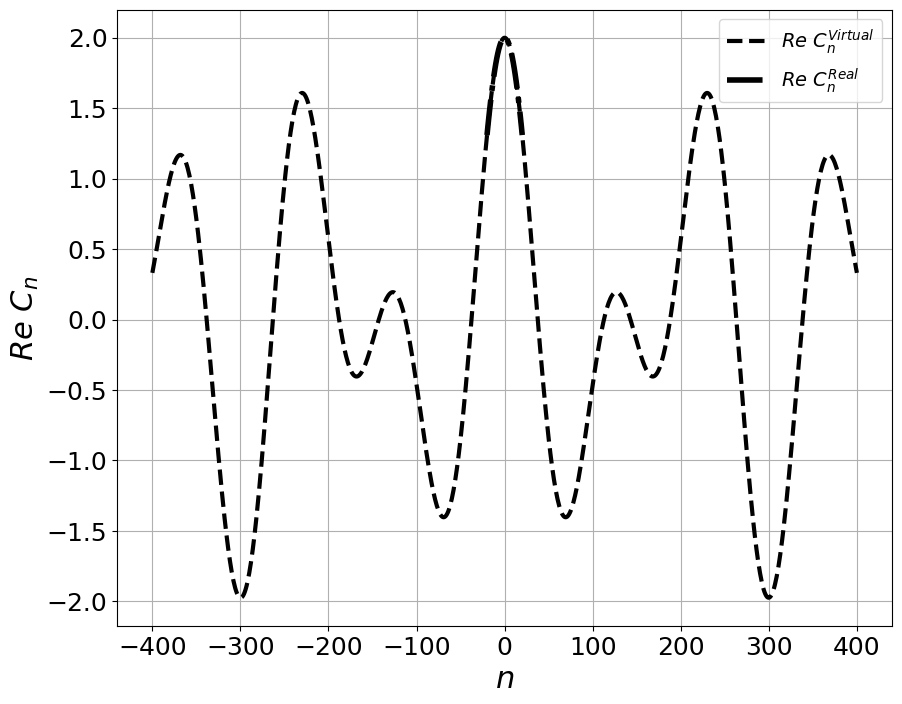

In [82]:
"""
Действительные значения коэффициентов $C_n$ принятого сигнала на приемном устройстве $n$; 
ось абсцисс $n$ - номер приёмного устройства ЦАР относительно центра;
ось ординат $Re(C_n)$ - действительные значения коэффициентов принятого сигнала на $n$-том элементе;
толстая сплошная линия обозначает значения коэффициентов $C_n$ моделируемой ЦАР, измеренные с реальных физических устройств;
тонкая штриховая линия обозначает значения коэффициентов $C_n$ виртуальной ЦАР, моделируемые той же функцией.
"""

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(n_virtual, np.real(Cn_virtual), label = "$Re\ C_{n}^{Virtual}$", 
         c = "#000000", linestyle = "--",linewidth = 3)
plt.plot(n_real, np.real(Cn_real), label = "$Re\ C_{n}^{Real}$", 
         c = "#000000", linestyle = "-.",linewidth = 4)
plt.legend(fontsize = 14)
plt.grid()
plt.xlabel(r'$n$', fontsize = 22)
plt.ylabel(r'$Re\ C_n$', fontsize=22)
plt.savefig("../rmarkdown_report/Begin_virtual_bw.png")
plt.savefig("../latex/images/Begin_virtual_bw.png", bbox_inches='tight')

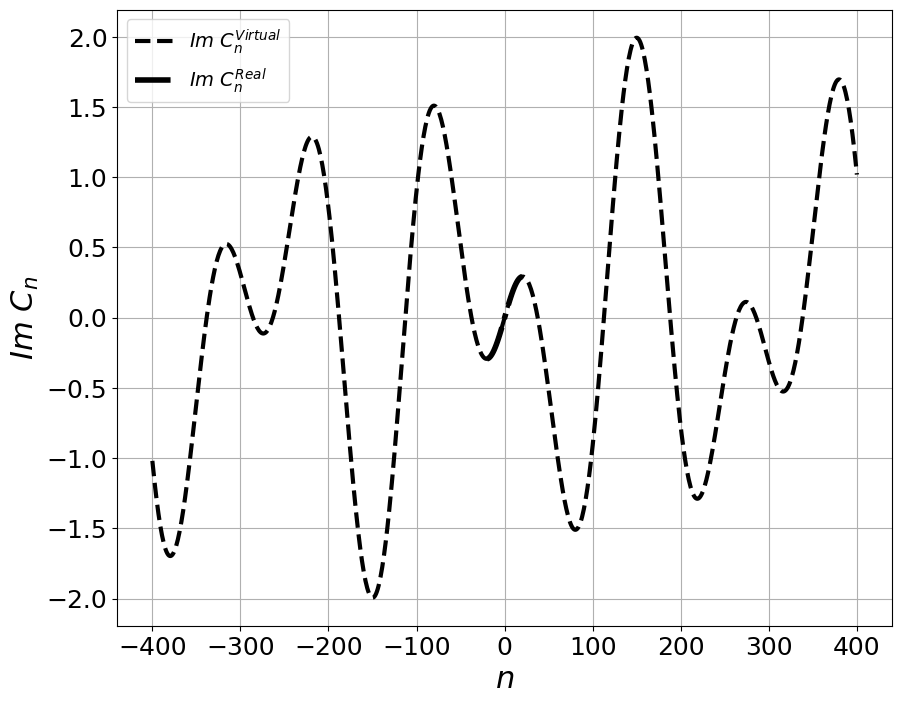

In [83]:
R"""
Действительные значения коэффициентов $C_n$ принятого сигнала на приемном устройстве $n$; 
ось абсцисс $n$ - номер приёмного устройства ЦАР относительно центра;
ось ординат $Im(C_n)$ - мнимые значения коэффициентов принятого сигнала на $n$-том элементе;
толстая сплошная линия обозначает значения коэффициентов $C_n$ моделируемой ЦАР, измеренные с реальных физических устройств;
тонкая штриховая линия обозначает значения коэффициентов $C_n$ виртуальной ЦАР, моделируемые той же функцией.
"""

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(n_virtual, np.imag(Cn_virtual), 
         label = "$Im\ C_{n}^{Virtual}$", 
         c = "#000000", 
         linestyle = "--", 
         linewidth = 3)
plt.plot(n_real, np.imag(Cn_real), 
         label = "$Im\ C_n^{Real}$", 
         c = "#000000", 
         linestyle = "-.", 
         linewidth = 4)
plt.legend(fontsize = 14)
plt.grid()
plt.xlabel(r'$n$', fontsize = 22)
plt.ylabel(r'$Im\ C_n$', fontsize = 22)
plt.savefig("../rmarkdown_report/Begin_virtual_imag_bw.png")
plt.savefig("../latex/images/Begin_virtual_imag_bw.png", bbox_inches='tight')

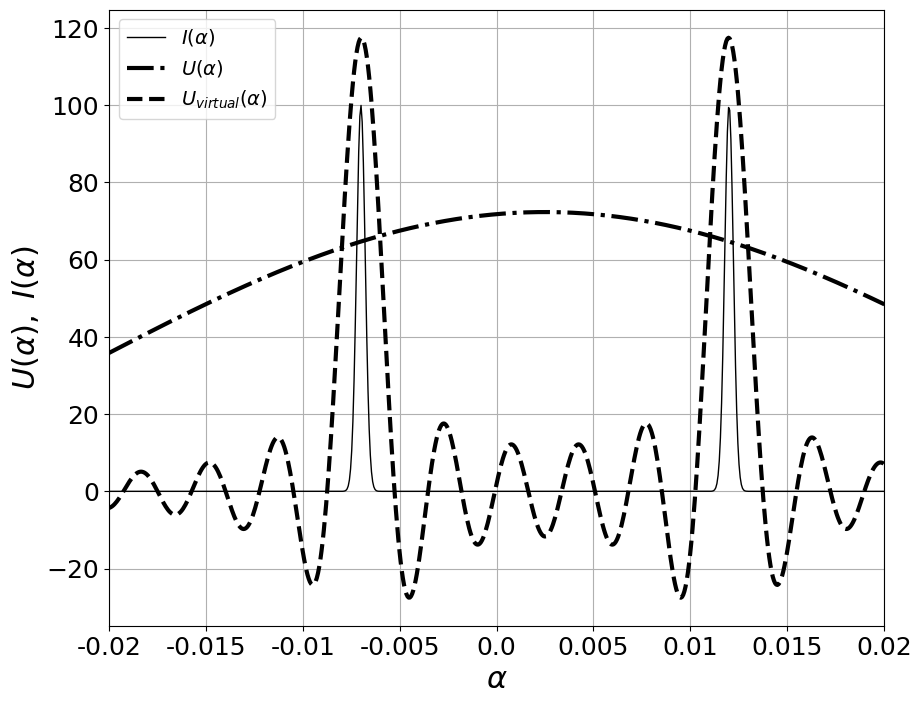

In [19]:
"""

"""

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(alpha, signals / 3, 
         label = r"$I(\alpha)$", c = "#000000", linewidth = 1)
plt.plot(alpha, np.real(U_real), 
         label = r"$U(\alpha)$", c = "#000000", linewidth = 3, linestyle = "-.")
plt.plot(alpha, np.real(U_virtual) / 7, 
         label = r"$U_{virtual}(\alpha)$", c = "#000000", linewidth = 3, linestyle = "--")
plt.xlim((-0.02, 0.02))
plt.xticks([])
plt.xticks(np.arange(-0.02, 0.021, 0.005), np.round(np.arange(-0.02, 0.021, 0.005), 3))
plt.legend(fontsize = 14)
plt.grid()
plt.xlabel(r"$\alpha$", fontsize = 22)
plt.ylabel(r"$U(\alpha),\ I(\alpha)$", fontsize = 22)
plt.savefig("../rmarkdown_report/Begin_target_bw.png")
plt.savefig("../latex/images/Begin_target_bw.png", bbox_inches='tight')

## Определение Минимального расстояния Разрешения сигнала по критерию Рэлея

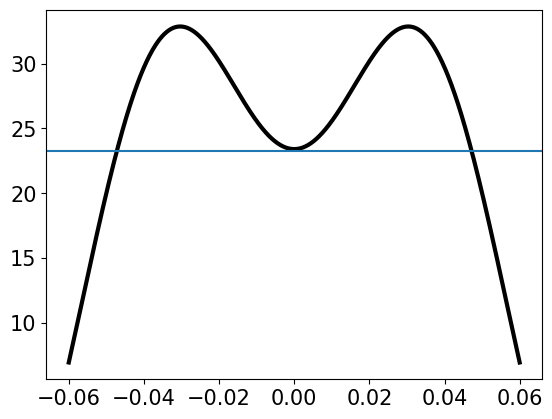

In [10]:
K = 20              # Реальное количество излучателей
NP = 400            # Виртуальное количество излучателей
k = 2 * np.pi       # Волновое число
d = 0.7             # Расстояние между излучателями
alpha0 = 0.06

alpha = np.linspace(-alpha0, alpha0, 2001)  # Угловое разрешение области

n_real = np.arange(-K, K + 1)                 # Реальное перечисление номеров излучателей

for alpha_iter in alpha[:len(alpha)//2+1]:
    targets = [-alpha_iter, alpha_iter]              # Положения целей
    Cn_real = Cn_deltaf_compute(n_real, k, d, targets)              # Реальные Cn излучателей от -K до K включительно
    # Реально принятый сигнал
    U_real = U_compute(alpha, Cn_real, k, d)
    if np.max(np.real(U_real))/np.sqrt(2) <= np.real(U_real)[len(alpha)//2]:
        break
    

plt.plot(alpha, np.real(U_real), label = "Принятый сигнал, физическая система", c = "#000000", linewidth = 3)
plt.axline((-0.04, np.max(np.real(U_real))/np.sqrt(2)), (0.04, np.max(np.real(U_real))/np.sqrt(2)))

Минимальное расстояние между целями $\cfrac{Q_p}{2} = 0.0265$, при 

## Определение данных и нейросети

In [20]:
def create_data(number_of_samples = 10000, n_real = 20, n_virtual = 400, target_bounds = [-0.04, 0.04],
                k = 1, d = 1, noised = False, noise_level = 0.4, seed = 123):
    data_x = np.zeros((4 * number_of_samples, n_real * 2 + 1)) + 0j
    data_y = np.zeros((4 * number_of_samples, n_virtual * 2 + 1)) + 0j

    np.random.seed(123)
    real = np.arange(-n_real, n_real + 1)                 # Реальное перечисление номеров излучателей
    virtual = np.arange(-n_virtual, n_virtual + 1)            # Идеальное (виртуальное) число излучателей

    for sample_num in np.arange(number_of_samples):
        targets = [np.random.uniform(target_bounds[0], target_bounds[0] * 0.0001, 1),\
                  np.random.uniform(target_bounds[1] * 0.0001, target_bounds[1], 1)]
        data_x[sample_num, :] = Cn_deltaf_compute(real, k, d, targets)
        data_y[sample_num, :] = Cn_deltaf_compute(virtual, k, d, targets)

    for sample_num in np.arange(number_of_samples):
        targets = []
        targets.append(np.random.uniform(target_bounds[0], target_bounds[0] * 0.05, 1))
        targets.append(np.abs(targets[0]))
        data_x[number_of_samples + sample_num, :] = Cn_deltaf_compute(real, k, d, targets)
        data_y[number_of_samples + sample_num, :] = Cn_deltaf_compute(virtual, k, d, targets)

    for sample_num in np.arange(number_of_samples):
        targets = []
        targets.append(np.random.uniform(target_bounds[0], 0.5 * target_bounds[0], 1))
        targets.append(np.random.uniform(0.5 * target_bounds[0], 0, 1))
        data_x[2 * number_of_samples + sample_num, :] = Cn_deltaf_compute(real, k, d, targets)
        data_y[2 * number_of_samples + sample_num, :] = Cn_deltaf_compute(virtual, k, d, targets)

    for sample_num in np.arange(number_of_samples):
        targets = []
        targets.append(np.random.uniform(0, target_bounds[1] * 0.5, 1))
        targets.append(np.random.uniform(0.5 * target_bounds[1], target_bounds[1], 1))
        data_x[3 * number_of_samples + sample_num, :] = Cn_deltaf_compute(real, k, d, targets)
        data_y[3 * number_of_samples + sample_num, :] = Cn_deltaf_compute(virtual, k, d, targets)



    return data_x, data_y

In [9]:
X, Y = create_data(number_of_samples = 10000, k = k, d = d)
order = np.random.permutation(X.shape[0])
X = X[order]
Y = Y[order]

X_val, Y_val = create_data(number_of_samples = 1000, k = k, d = d)
order_val = np.random.permutation(X_val.shape[0])
X_val = X_val[order_val]
Y_val = Y_val[order_val]

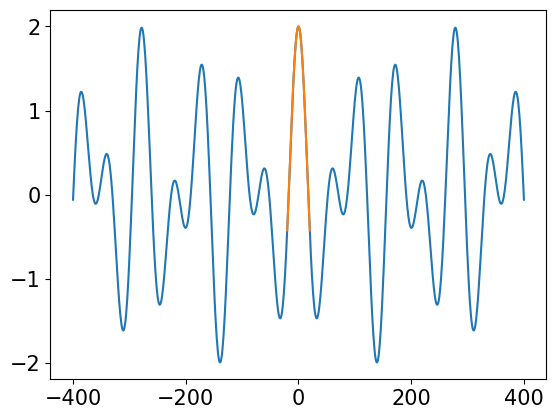

In [10]:
plt.plot(np.arange(-NP, NP+1), np.real(Y[8002,:]))
plt.plot(np.arange(-K, K + 1), np.real(X[8002,:]))

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(my_seed)
torch.use_deterministic_algorithms(False)
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

class RegressionNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = F.selu(self.fc1(x))
        x = self.dropout(x)
        x = F.selu(self.fc2(x))
        x = self.dropout(x)
        x = F.selu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

    def inference(self, x):
        x = F.selu(self.fc1(x))
        x = F.selu(self.fc2(x))
        x = F.selu(self.fc3(x))
        x = self.fc4(x)
        return x

In [12]:
X_tensor_real  = torch.tensor(np.real(X), dtype = torch.float, device=device)
Y_tensor_real = torch.tensor(np.real(Y), dtype = torch.float, device=device)
X_val_tensor_real = torch.tensor(np.real(X_val), dtype = torch.float, device=device)
Y_val_tensor_real = torch.tensor(np.real(Y_val), dtype = torch.float, device=device)

X_tensor_imag  = torch.tensor(np.imag(X), dtype = torch.float, device=device)
Y_tensor_imag = torch.tensor(np.imag(Y), dtype = torch.float, device=device)
X_val_tensor_imag = torch.tensor(np.imag(X_val), dtype = torch.float, device=device)
Y_val_tensor_imag = torch.tensor(np.imag(Y_val), dtype = torch.float, device=device)

In [22]:
model_superresolution_real = RegressionNet(input_size = 2 * K + 1, hidden_size = 500,
                                      output_size = 2 * NP + 1, dropout_prob = 0.00)
model_superresolution_imag = RegressionNet(input_size = 2 * K + 1, hidden_size = 500,
                                      output_size = 2 * NP + 1, dropout_prob = 0.00)

In [23]:
model_superresolution_real.load_state_dict(torch.load("model_params_real", map_location = device))
model_superresolution_imag.load_state_dict(torch.load("model_params_imag", map_location = device))

<All keys matched successfully>

In [15]:
rate = 1e-4
batch_size = 400
num_epochs = 400

criterion = nn.MSELoss()
optimizer_real = torch.optim.Adam(model_superresolution_real.parameters(), lr = rate)
optimizer_imag = torch.optim.Adam(model_superresolution_imag.parameters(), lr = rate)

optimizer_real.zero_grad()
optimizer_imag.zero_grad()

In [26]:
model_superresolution_real.to(device)
model_superresolution_imag.to(device)
for epoch in range(num_epochs):
    running_loss_real = 0.0
    running_loss_imag = 0.0
    order = np.random.permutation(X_tensor_real.shape[0])
    for i in range(0, X_tensor_real.shape[0], batch_size): # пакеты по 10 изображений
        indexes = order[i:i+batch_size]
        batch_inputs_real = X_tensor_real[indexes]
        batch_labels_real = Y_tensor_real[indexes]

        batch_inputs_imag = X_tensor_imag[indexes]
        batch_labels_imag = Y_tensor_imag[indexes]

        # обнуление градиентов
        optimizer_real.zero_grad()
        optimizer_imag.zero_grad()

        # передача данных через модель
        outputs_real = model_superresolution_real(batch_inputs_real)
        outputs_imag = model_superresolution_imag(batch_inputs_imag)

        # расчет функции потерь
        loss_real = criterion(outputs_real, batch_labels_real)
        loss_imag = criterion(outputs_imag, batch_labels_imag)

        # обратное распространение ошибки и обновление весов
        loss_real.backward()
        loss_imag.backward()
        optimizer_real.step()
        optimizer_imag.step()
        # суммирование потерь на каждой эпохе
        running_loss_real += loss_real.item()
        running_loss_imag += loss_imag.item()

    if (epoch+1) % 3 == 0:
        with torch.no_grad():
            loss_val_real = criterion(model_superresolution_real.inference(X_val_tensor_real), Y_val_tensor_real)
            loss_val_imag = criterion(model_superresolution_imag.inference(X_val_tensor_imag), Y_val_tensor_imag)
            print("Val Epoch %d loss real: $.5f" % (epoch + 1), loss_val_real.item())
            print("Val Epoch %d loss imag: $.5f" % (epoch + 1), loss_val_imag.item())

    # вывод потерь на каждой эпохе
    print('Epoch %d loss real: %.5f' % (epoch + 1, running_loss_real / X_tensor_real.shape[0] * batch_size))
    print('Epoch %d loss imag: %.5f' % (epoch + 1, running_loss_imag / X_tensor_imag.shape[0] * batch_size))

Epoch 1 loss real: 0.05254
Epoch 1 loss imag: 0.10655
Epoch 2 loss real: 0.05062
Epoch 2 loss imag: 0.10791
Val Epoch 3 loss real: $.5f 0.046108923852443695
Val Epoch 3 loss imag: $.5f 0.10571524500846863
Epoch 3 loss real: 0.04980
Epoch 3 loss imag: 0.10653
Epoch 4 loss real: 0.05196
Epoch 4 loss imag: 0.10612
Epoch 5 loss real: 0.05054
Epoch 5 loss imag: 0.10584
Val Epoch 6 loss real: $.5f 0.05797712132334709
Val Epoch 6 loss imag: $.5f 0.10706476867198944
Epoch 6 loss real: 0.05001
Epoch 6 loss imag: 0.10513
Epoch 7 loss real: 0.05251
Epoch 7 loss imag: 0.10524
Epoch 8 loss real: 0.05082
Epoch 8 loss imag: 0.10629
Val Epoch 9 loss real: $.5f 0.0644269734621048
Val Epoch 9 loss imag: $.5f 0.10590571165084839
Epoch 9 loss real: 0.04894
Epoch 9 loss imag: 0.10607
Epoch 10 loss real: 0.05893
Epoch 10 loss imag: 0.10649
Epoch 11 loss real: 0.05236
Epoch 11 loss imag: 0.10630
Val Epoch 12 loss real: $.5f 0.05368427559733391
Val Epoch 12 loss imag: $.5f 0.10392433404922485
Epoch 12 loss re

In [27]:
torch.save(model_superresolution_real.state_dict(), "model_params_real")
torch.save(model_superresolution_imag.state_dict(), "model_params_imag")

In [13]:
model_superresolution_real.to(torch.device("cpu"))
model_superresolution_imag.to(torch.device("cpu"))

RegressionNet(
  (fc1): Linear(in_features=41, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=500, bias=True)
  (fc4): Linear(in_features=500, out_features=801, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)

In [53]:
targets = [-0.005, 0.005]              # Положения целей
n_real = np.arange(-K, K + 1)                 # Реальное перечисление номеров излучателей
n_virtual = np.arange(-NP, NP + 1)            # Идеальное (виртуальное) число излучателей

Cn_real = Cn_deltaf_compute(n_real, k, d, targets)              # Реальные Cn излучателей от -K до K включительно
Cn_virtual = Cn_deltaf_compute(n_virtual, k, d, targets)        # Виртуальные Cn излучателей (как хотим чтобы было)

Cn_nn = model_superresolution_real(torch.tensor(np.real(Cn_real), dtype = torch.float)).detach() + 1j * model_superresolution_imag(torch.tensor(np.imag(Cn_real), dtype = torch.float)).detach()

# Для отрисовки целей
signals = signal_gauss(alpha, alpha0 = targets, scale = 0.00000005, amp = amplitude)

# Реально принятый сигнал
U_real = U_compute(alpha, Cn_real, k, d)

# Как должно быть по факту
U_virtual = U_compute(alpha, Cn_virtual, k, d)

# Принятый сигнал виртуальной системой
U_nn = U_compute(alpha, Cn_nn, k, d)

In [54]:
## Сохранение результатов работы модели

data_frame_symmetric = pd.DataFrame(np.hstack([np.real(Cn_nn).reshape(-1, 1), 
                                               np.imag(Cn_nn).reshape(-1, 1), 
                                               np.arange(-NP, NP + 1).reshape(-1, 1)]),
                                   columns = ["Cn_real", "Cn_imag", "n"])
data_frame_symmetric.to_csv("../sheets_output/Cn_nn_results.csv")

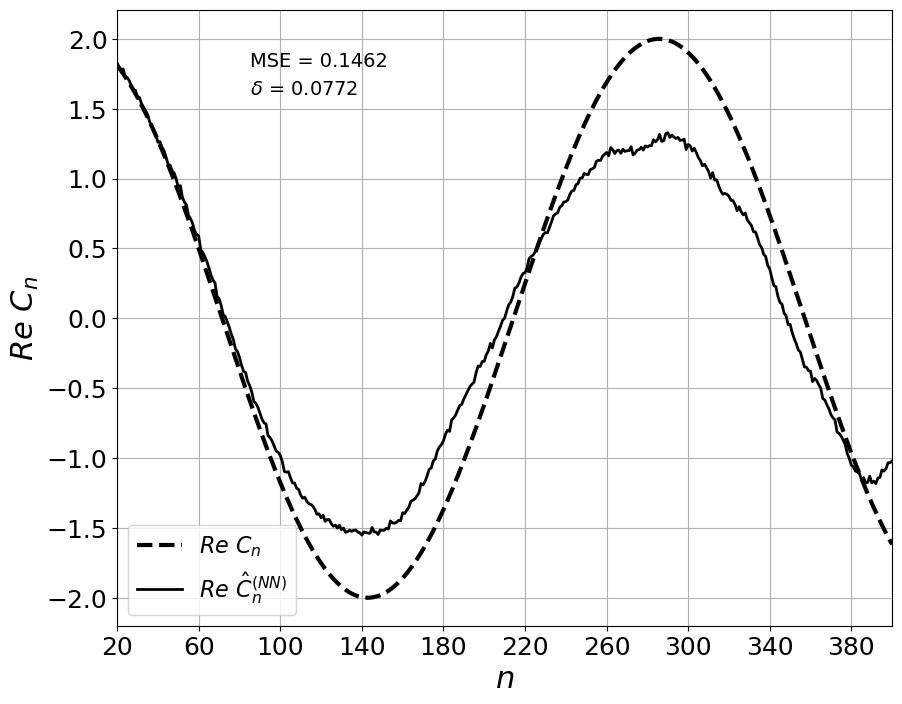

In [55]:
d11 = np.sum((np.real(Cn_virtual) - np.real(np.array(Cn_nn))) ** 2) / n_virtual.shape[0]
D11 = np.sum((np.real(Cn_virtual) - np.real(np.array(Cn_nn))) ** 2) / np.sum((np.real(Cn_virtual)) ** 2)

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(n_virtual, np.real(Cn_virtual), label = "$Re\ C_{n}$", linewidth = 3, c = "#000000", linestyle = "--")
plt.plot(n_virtual, np.real(Cn_nn), label = "$Re\ \hat{C}_{n}^{(NN)}$", linestyle = "-", c = "#000000", linewidth = 2)
# plt.plot(n_real, np.real(Cn_real), 
#          label = "Real devices", 
#          c = "#000000", 
#          linestyle = "-.", 
#          linewidth = 4)
plt.legend(fontsize = 16)
plt.grid()
plt.xlim((20, 400))
plt.xticks([])
plt.xticks(np.arange(20, 400, 40), np.arange(20, 400, 40))
plt.text(85,
         1.8,
         "MSE = %.4f" % d11,
        fontsize = 14)
plt.text(85,
         1.6,
         "$\delta$ = %.4f" % D11,
        fontsize = 14)
plt.xlabel(r"$n$", fontsize = 22)
plt.ylabel(r"$Re\ C_n$", fontsize = 22)
plt.savefig("../rmarkdown_report/complete_virtual1_real_bw.png")
plt.savefig("../latex/images/complete_virtual1_real_bw.png", bbox_inches='tight')

In [56]:
"""
График косплексных значений для предсказываемых значений, нейронная сеть выдает ошибки в окраине нуля
"""

# d12 = np.sum((np.imag(Cn_virtual) - np.imag(np.array(Cn_nn))) ** 2) / n_virtual.shape[0]


# plt.figure(figsize = (10, 8), dpi = 100)
# plt.plot(n_virtual, np.imag(Cn_virtual), label = "Виртуальная система, желаемые значения", linewidth = 2, c = "#000000", linestyle = "--")
# plt.plot(n_virtual, np.imag(Cn_nn), label = "Прогноз нейросетевой моделью", linestyle = "-", c = "#000000")
# #plt.legend()
# plt.text(85,
#          0.10,
#          "MSE = %.4f" % d12,
#         fontsize = 15)
# plt.grid()
# plt.xlabel("Номер приёмного устройства относительно центра ЦАР")
# plt.ylabel("Мнимые значения коэффициента")
# plt.savefig("../rmarkdown_report/complete_virtual1_imag_bw.png")

'\nГрафик косплексных значений для предсказываемых значений, нейронная сеть выдает ошибки в окраине нуля\n'

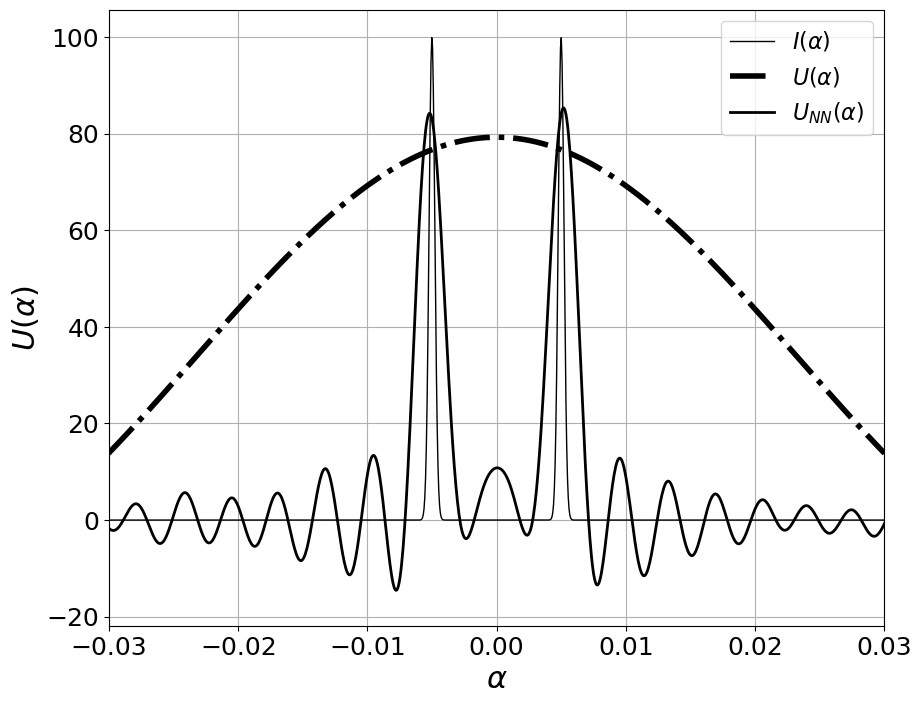

In [57]:
plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(alpha, signals / 3, label = r"$I(\alpha)$", c = "#000000", linewidth = 1)
plt.plot(alpha, np.real(U_real), label = r"$U(\alpha)$", c = "#000000", linewidth = 4, linestyle = "-.")
#plt.plot(alpha, np.real(U_virtual), label = "Принятый сигнал, виртуальная система", c = "#000000", linewidth = 2, linestyle = "--")
plt.plot(alpha, np.real(U_nn) / 7, label = r"$U_{NN}(\alpha)$", c = "#000000", linewidth = 2)
plt.xlim((-0.03, 0.03))
plt.legend(fontsize = 16)
plt.grid()
plt.xlabel(r"$\alpha$", fontsize = 22)
plt.ylabel(r"$U(\alpha)$", fontsize = 22)
plt.savefig("../rmarkdown_report/Complete1_target_bw.png")
plt.savefig("../latex/images/Complete1_target_bw.png", bbox_inches='tight')

## Несимметричные цели

In [58]:
targets = [-0.027, 0.017]              # Положения целей
n_real = np.arange(-K, K + 1)                 # Реальное перечисление номеров излучателей
n_virtual = np.arange(-NP, NP + 1)            # Идеальное (виртуальное) число излучателей

Cn_real = Cn_deltaf_compute(n_real, k, d, targets)              # Реальные Cn излучателей от -K до K включительно
Cn_virtual = Cn_deltaf_compute(n_virtual, k, d, targets)        # Виртуальные Cn излучателей (как хотим чтобы было)

Cn_nn = model_superresolution_real(torch.tensor(np.real(Cn_real), dtype = torch.float)).detach() + 1j * model_superresolution_imag(torch.tensor(np.imag(Cn_real), dtype = torch.float)).detach()

# Для отрисовки целей
signals = signal_gauss(alpha, alpha0 = targets, scale = 0.00000005, amp = amplitude)

# Реально принятый сигнал
U_real = U_compute(alpha, Cn_real, k, d)

# Как должно быть по факту
U_virtual = U_compute(alpha, Cn_virtual, k, d)

# Принятый сигнал виртуальной системой
U_nn = U_compute(alpha, Cn_nn, k, d)

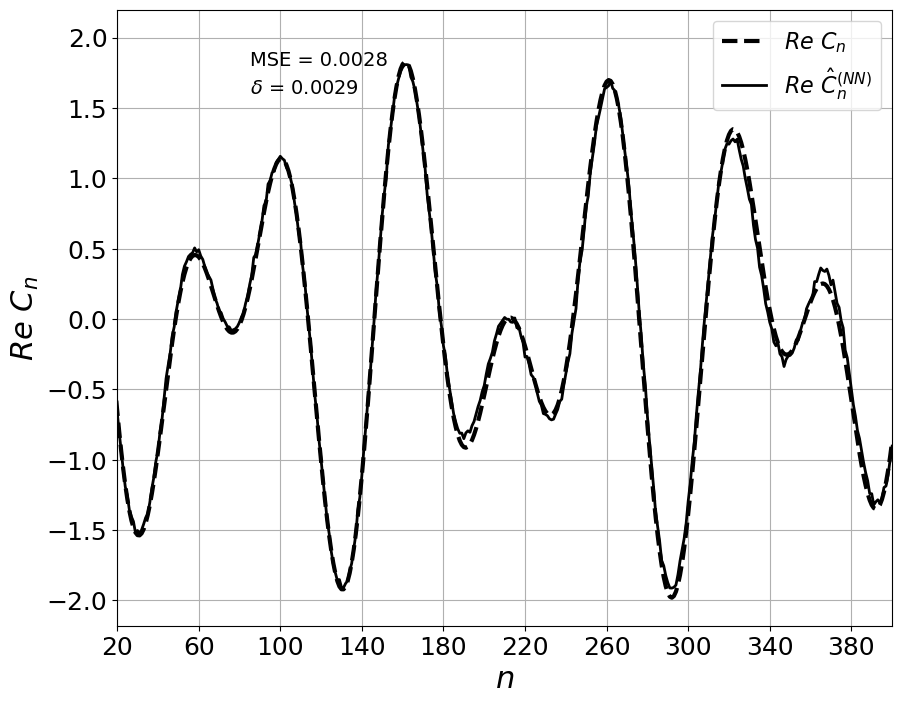

In [59]:
d21 = np.sum((np.real(Cn_virtual) - np.real(np.array(Cn_nn))) ** 2) / n_virtual.shape[0]
D21 = np.sum((np.real(Cn_virtual) - np.real(np.array(Cn_nn))) ** 2) / np.sum((np.real(Cn_virtual)) ** 2)

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(n_virtual, np.real(Cn_virtual), label = "$Re\ C_{n}$", linewidth = 3, c = "#000000", linestyle = "--")
plt.plot(n_virtual, np.real(Cn_nn), label = "$Re\ \hat{C}_{n}^{(NN)}$", linestyle = "-", c = "#000000", linewidth = 2)
plt.xlim((20, 400))
plt.xticks([])
plt.xticks(np.arange(20, 400, 40),np.arange(20, 400, 40))
plt.legend(fontsize = 16)
plt.grid()
plt.text(85,
         1.8,
         "MSE = %.4f" % d21,
        fontsize = 14)
plt.text(85,
         1.6,
         "$\delta$ = %.4f" % D21,
        fontsize = 14)
plt.xlabel(r"$n$", fontsize = 22)
plt.ylabel(r"$Re\ C_n$", fontsize = 22)
plt.savefig("../rmarkdown_report/complete_virtual2_real_bw.png")
plt.savefig("../latex/images/complete_virtual2_real_bw.png", bbox_inches='tight')

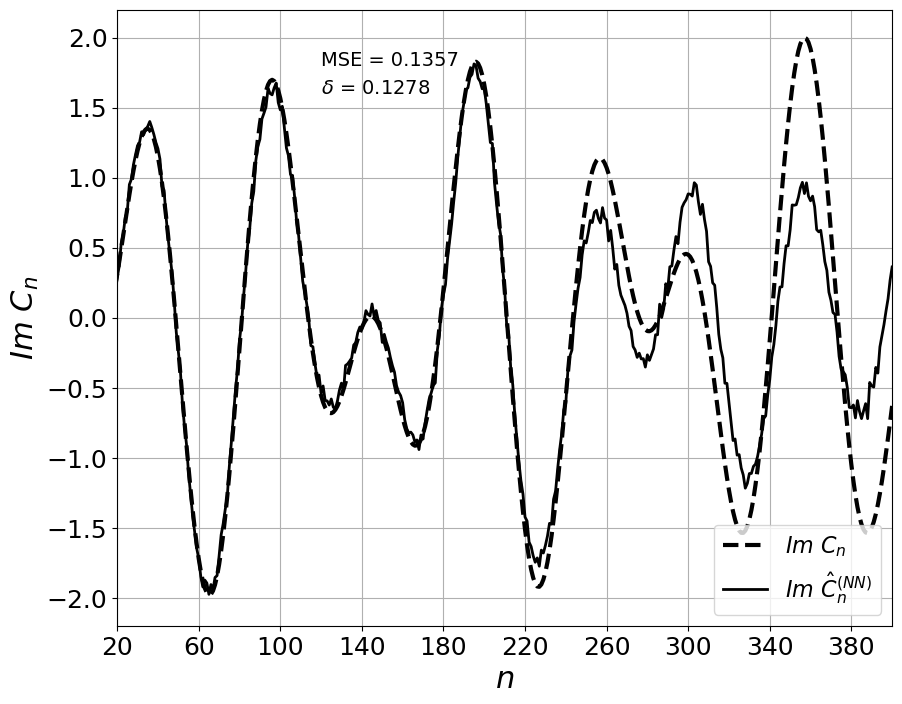

In [60]:
d22 = np.sum((np.imag(Cn_virtual) - np.imag(np.array(Cn_nn))) ** 2) / n_virtual.shape[0]
D22 = np.sum((np.imag(Cn_virtual) - np.imag(np.array(Cn_nn))) ** 2) / np.sum((np.imag(Cn_virtual)) ** 2)


plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(n_virtual, np.imag(Cn_virtual), label = "$Im\ C_n$", linewidth = 3, c = "#000000", linestyle = "--")
plt.plot(n_virtual, np.imag(Cn_nn), label = "$Im\ \hat{C}_{n}^{(NN)}$", linestyle = "-", c = "#000000", linewidth = 2)
plt.legend(fontsize = 16)
plt.xlim((20, 400))
plt.xticks([])
plt.xticks(np.arange(20, 400, 40),np.arange(20, 400, 40))
plt.text(120,
         1.8,
         "MSE = %.4f" % d22,
        fontsize = 14)
plt.text(120,
         1.6,
         "$\delta$ = %.4f" % D22,
        fontsize = 14)
plt.grid()
plt.xlabel(r"$n$", fontsize = 22)
plt.ylabel(r"$Im\ C_n$", fontsize = 22)
plt.savefig("../rmarkdown_report/complete_virtual2_imag_bw.png")
plt.savefig("../latex/images/complete_virtual2_imag_bw.png", bbox_inches='tight')

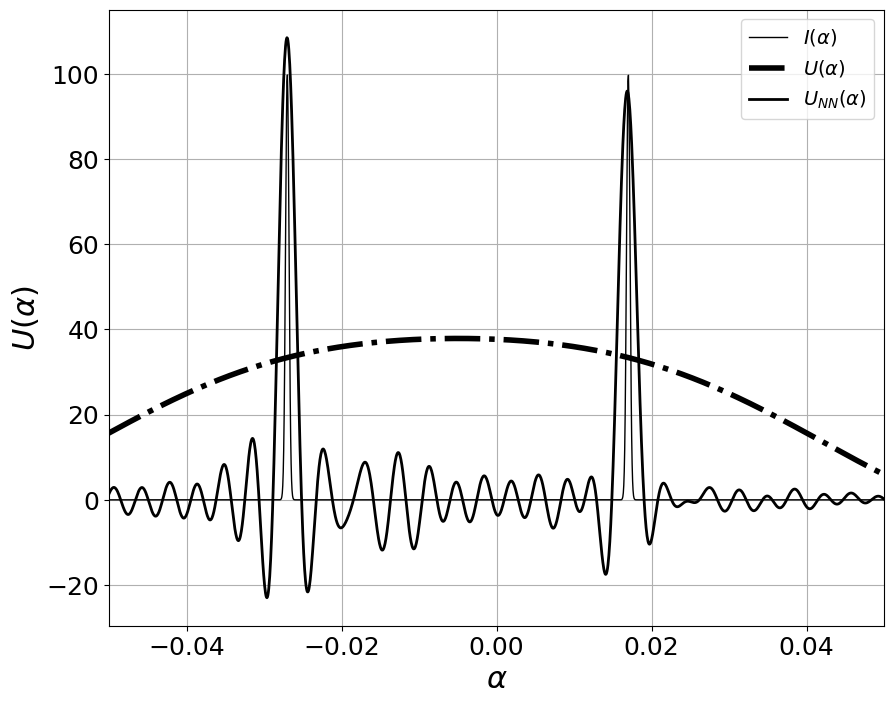

In [61]:
plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(alpha, signals / 3, label = r"$I(\alpha)$", c = "#000000", linewidth = 1)
plt.plot(alpha, np.real(U_real), label = r"$U(\alpha)$", c = "#000000", linewidth = 4, linestyle = "-.")
#plt.plot(alpha, np.real(U_virtual), label = "Принятый сигнал, виртуальная система", c = "#000000", linewidth = 2, linestyle = "--")
plt.plot(alpha, np.real(U_nn) / 7, label = r"$U_{NN}(\alpha)$", c = "#000000", linewidth = 2)
plt.xlim((-0.05, 0.05))
plt.legend(fontsize = 14)
plt.grid()
plt.xlabel(r"$\alpha$", fontsize = 22)
plt.ylabel(r"$U(\alpha)$", fontsize = 22)
plt.savefig("../latex/images/Complete2_target_bw.png", bbox_inches='tight')

## Односторонние цели

In [391]:
# targets = [0.005, 0.0195]              # Положения целей
# n_real = np.arange(-K, K + 1)                 # Реальное перечисление номеров излучателей
# n_virtual = np.arange(-NP, NP + 1)            # Идеальное (виртуальное) число излучателей

# Cn_real = Cn_deltaf_compute(n_real, k, d, targets)              # Реальные Cn излучателей от -K до K включительно
# Cn_virtual = Cn_deltaf_compute(n_virtual, k, d, targets)        # Виртуальные Cn излучателей (как хотим чтобы было)

# Cn_nn = model_superresolution_real(torch.tensor(np.real(Cn_real), dtype = torch.float)).detach() + 1j * model_superresolution_imag(torch.tensor(np.imag(Cn_real), dtype = torch.float)).detach()

# # Для отрисовки целей
# signals = signal_gauss(alpha, alpha0 = targets, scale = 0.00000005, amp = amplitude)

# # Реально принятый сигнал
# U_real = U_compute(alpha, Cn_real, k, d)

# # Как должно быть по факту
# U_virtual = U_compute(alpha, Cn_virtual, k, d)

# # Принятый сигнал виртуальной системой
# U_nn = U_compute(alpha, Cn_nn, k, d)

In [392]:
# d31 = np.sum((np.real(Cn_virtual) - np.real(np.array(Cn_nn))) ** 2) / n_virtual.shape[0]
# D31 = np.sum((np.real(Cn_virtual) - np.real(np.array(Cn_nn))) ** 2) / np.sum((np.real(Cn_virtual)) ** 2)

# plt.figure(figsize = (10, 8), dpi = 100)
# plt.plot(n_virtual, np.real(Cn_virtual), label = "Виртуальная система, желаемые значения", linewidth = 2, c = "#000000", linestyle = "--")
# plt.plot(n_virtual, np.real(Cn_nn), label = "Прогноз нейросетевой моделью", linestyle = "-", c = "#000000")
# #plt.legend()
# plt.grid()
# plt.text(85,
#          1.8,
#          "MSE = %.4f" % d31,
#         fontsize = 15)
# plt.text(85,
#          1.6,
#          "$\delta$ = %.4f" % D31,
#         fontsize = 15)
# plt.xlabel("Номер приёмного устройства относительно центра ЦАР")
# plt.ylabel("Действительные значения коэффициента")
# plt.savefig("../rmarkdown_report/complete_virtual3_real_bw.png")

In [393]:
# d32 = np.sum((np.imag(Cn_virtual) - np.imag(np.array(Cn_nn))) ** 2) / n_virtual.shape[0]
# D32 = np.sum((np.imag(Cn_virtual) - np.imag(np.array(Cn_nn))) ** 2) / np.sum((np.imag(Cn_virtual)) ** 2)


# plt.figure(figsize = (10, 8), dpi = 100)
# plt.plot(n_virtual, np.imag(Cn_virtual), label = "Виртуальная система, желаемые значения", linewidth = 2, c = "#000000", linestyle = "--")
# plt.plot(n_virtual, np.imag(Cn_nn), label = "Прогноз нейросетевой моделью", linestyle = "-", c = "#000000")
# #plt.legend()
# plt.text(160,
#          1.8,
#          "MSE = %.4f" % d32,
#         fontsize = 15)
# plt.text(160,
#          1.6,
#          "$\delta$ = %.4f" % D32,
#         fontsize = 15)
# plt.grid()
# plt.xlabel("Номер приёмного устройства относительно центра ЦАР")
# plt.ylabel("Мнимые значения коэффициента")
# plt.savefig("../rmarkdown_report/complete_virtual3_imag_bw.png")

In [394]:
# plt.figure(figsize = (10, 8), dpi = 100)
# plt.plot(alpha, signals, label = "Функции целей", c = "#000000", linewidth = 1)
# plt.plot(alpha, np.real(U_real), label = "Принятый сигнал, физическая система", c = "#000000", linewidth = 3)
# #plt.plot(alpha, np.real(U_virtual), label = "Принятый сигнал, виртуальная система", c = "#000000", linewidth = 2, linestyle = "--")
# plt.plot(alpha, np.real(U_nn), label = "Принятый сигнал, нейронная сеть", c = "#000000")
# #plt.legend()
# plt.grid()
# plt.xlabel("Угловое разрешение")
# plt.ylabel("Значения отраженного сигнала")
# plt.savefig("../rmarkdown_report/Complete3_target_bw.png")

## Определение для симметричных целей $Q_p$ и $Q_{0.5}$

In [22]:
alpha0 = 0.06
K = 20
NP = 400
alpha = np.linspace(-alpha0, alpha0, 15001)  # Угловое разрешение области

n_real = np.arange(-K, K + 1)                 # Реальное перечисление номеров излучателей


# TODO: theta_0.5 рассчитать для модели нейронной сети
alpha_cur = len(alpha)//4
q_p = []
q05 = []
for n in range(20, NP+1):
    for alpha_idx in range(alpha_cur, len(alpha)//2):
        targets = [alpha[alpha_idx], alpha[-alpha_idx]]              # Положения целей
        Cn_real = Cn_deltaf_compute(n_real, k, d, targets)              # Реальные Cn излучателей от -K до K включительно
        Cn_nn = model_superresolution_real(torch.tensor(np.real(Cn_real), dtype = torch.float)).detach() + 1j * model_superresolution_imag(torch.tensor(np.imag(Cn_real), dtype = torch.float)).detach()
        # Реально принятый сигнал
        U_nn = U_compute(alpha, Cn_nn[NP - n:NP + n + 1], k, d)
        if np.max(np.array(np.real(U_nn)))/np.sqrt(2) <= np.real(U_nn)[len(alpha)//2]:
            alpha_cur = alpha_idx
            q_p.append(alpha[alpha_idx])
            #q_p.append(alpha[alpha_idx])
            #print(f"n = {n} completed!, alpha = {alpha[alpha_idx]}")
            print(f"n = {n} completed!, alpha = {alpha[np.argmax(np.array(np.real(U_nn)))]}")
            break
            

n = 20 completed!, alpha = 0.030399999999999996
n = 21 completed!, alpha = 0.02895199999999999
n = 22 completed!, alpha = 0.027623999999999996
n = 23 completed!, alpha = 0.026455999999999993
n = 24 completed!, alpha = 0.025368
n = 25 completed!, alpha = 0.024384000000000003
n = 26 completed!, alpha = 0.023440000000000003
n = 27 completed!, alpha = 0.022568000000000005
n = 28 completed!, alpha = 0.021776000000000004
n = 29 completed!, alpha = 0.021040000000000003
n = 30 completed!, alpha = 0.020351999999999995
n = 31 completed!, alpha = 0.019704
n = 32 completed!, alpha = 0.019096000000000002
n = 33 completed!, alpha = 0.018544000000000005
n = 34 completed!, alpha = 0.018007999999999996
n = 35 completed!, alpha = 0.017488000000000004
n = 36 completed!, alpha = 0.017016000000000003
n = 37 completed!, alpha = 0.016560000000000005
n = 38 completed!, alpha = 0.016112
n = 39 completed!, alpha = 0.015696
n = 40 completed!, alpha = 0.015311999999999992
n = 41 completed!, alpha = 0.014927999999

n = 191 completed!, alpha = 0.003248000000000001
n = 192 completed!, alpha = 0.003248000000000001
n = 193 completed!, alpha = 0.0032240000000000046
n = 194 completed!, alpha = 0.0032080000000000025
n = 195 completed!, alpha = 0.0031840000000000063
n = 196 completed!, alpha = 0.003159999999999996
n = 197 completed!, alpha = 0.003159999999999996
n = 198 completed!, alpha = 0.003136
n = 199 completed!, alpha = 0.0031199999999999978
n = 200 completed!, alpha = 0.0030960000000000015
n = 201 completed!, alpha = 0.0030960000000000015
n = 202 completed!, alpha = 0.0030799999999999994
n = 203 completed!, alpha = 0.003056000000000003
n = 204 completed!, alpha = 0.003040000000000001
n = 205 completed!, alpha = 0.003040000000000001
n = 206 completed!, alpha = 0.003016000000000005
n = 207 completed!, alpha = 0.0030000000000000027
n = 208 completed!, alpha = 0.0029759999999999925
n = 209 completed!, alpha = 0.0029759999999999925
n = 210 completed!, alpha = 0.0029600000000000043
n = 211 completed!, a

n = 358 completed!, alpha = 0.0018159999999999982
n = 359 completed!, alpha = 0.001792000000000002
n = 360 completed!, alpha = 0.001799999999999996
n = 361 completed!, alpha = 0.001799999999999996
n = 362 completed!, alpha = 0.0017840000000000009
n = 363 completed!, alpha = 0.001792000000000002
n = 364 completed!, alpha = 0.0017679999999999987
n = 365 completed!, alpha = 0.0017759999999999998
n = 366 completed!, alpha = 0.0017840000000000009
n = 367 completed!, alpha = 0.0017599999999999977
n = 368 completed!, alpha = 0.0017679999999999987
n = 369 completed!, alpha = 0.0017519999999999966
n = 370 completed!, alpha = 0.0017519999999999966
n = 371 completed!, alpha = 0.0017599999999999977
n = 372 completed!, alpha = 0.0017440000000000025
n = 373 completed!, alpha = 0.0017440000000000025
n = 374 completed!, alpha = 0.0017280000000000004
n = 375 completed!, alpha = 0.0017280000000000004
n = 376 completed!, alpha = 0.0017360000000000014
n = 377 completed!, alpha = 0.0017199999999999993
n = 

In [23]:
# Рассчитать theta_p и theta_0.5 для моделируемых источников по функции экспоненты
alpha_cur = len(alpha)//4
q_p_virtual = []
q05_virtual = []
for n in range(20, NP+1):
    for alpha_idx in range(alpha_cur, len(alpha)//2):
        targets = [alpha[alpha_idx], alpha[-alpha_idx]]              # Положения целей
        Cn_virtual = Cn_deltaf_compute(np.arange(-n, n+1), k, d, targets)              # Реальные Cn излучателей от -K до K включительно
        # Реально принятый сигнал
        U_nn = U_compute(alpha, Cn_virtual, k, d)
        if np.max(np.array(np.real(U_nn)))/np.sqrt(2) <= np.real(U_nn)[len(alpha)//2]:
            alpha_cur = alpha_idx
            q_p_virtual.append(alpha[alpha_idx])
            print(f"n = {n} completed!, alpha = {alpha[alpha_idx]}")
            break

n = 20 completed!, alpha = -0.02656
n = 21 completed!, alpha = -0.025320000000000002
n = 22 completed!, alpha = -0.024191999999999998
n = 23 completed!, alpha = -0.023168
n = 24 completed!, alpha = -0.022216
n = 25 completed!, alpha = -0.021344000000000002
n = 26 completed!, alpha = -0.020544
n = 27 completed!, alpha = -0.019791999999999997
n = 28 completed!, alpha = -0.019096000000000002
n = 29 completed!, alpha = -0.018448
n = 30 completed!, alpha = -0.017848000000000003
n = 31 completed!, alpha = -0.017279999999999997
n = 32 completed!, alpha = -0.016744000000000002
n = 33 completed!, alpha = -0.016248
n = 34 completed!, alpha = -0.015776
n = 35 completed!, alpha = -0.015328000000000001
n = 36 completed!, alpha = -0.014912000000000002
n = 37 completed!, alpha = -0.014511999999999997
n = 38 completed!, alpha = -0.014136000000000003
n = 39 completed!, alpha = -0.013775999999999997
n = 40 completed!, alpha = -0.013432
n = 41 completed!, alpha = -0.013111999999999999
n = 42 completed!, 

n = 192 completed!, alpha = -0.002824
n = 193 completed!, alpha = -0.002807999999999998
n = 194 completed!, alpha = -0.002792000000000003
n = 195 completed!, alpha = -0.0027760000000000007
n = 196 completed!, alpha = -0.0027599999999999986
n = 197 completed!, alpha = -0.0027519999999999975
n = 198 completed!, alpha = -0.0027360000000000023
n = 199 completed!, alpha = -0.00272
n = 200 completed!, alpha = -0.002703999999999998
n = 201 completed!, alpha = -0.002695999999999997
n = 202 completed!, alpha = -0.002680000000000002
n = 203 completed!, alpha = -0.0026639999999999997
n = 204 completed!, alpha = -0.0026559999999999986
n = 205 completed!, alpha = -0.0026400000000000035
n = 206 completed!, alpha = -0.0026320000000000024
n = 207 completed!, alpha = -0.0026160000000000003
n = 208 completed!, alpha = -0.002599999999999998
n = 209 completed!, alpha = -0.002591999999999997
n = 210 completed!, alpha = -0.002576000000000002
n = 211 completed!, alpha = -0.002568000000000001
n = 212 complete

n = 356 completed!, alpha = -0.0015200000000000005
n = 357 completed!, alpha = -0.0015119999999999995
n = 358 completed!, alpha = -0.0015119999999999995
n = 359 completed!, alpha = -0.0015039999999999984
n = 360 completed!, alpha = -0.0015039999999999984
n = 361 completed!, alpha = -0.0014959999999999973
n = 362 completed!, alpha = -0.0014959999999999973
n = 363 completed!, alpha = -0.0014880000000000032
n = 364 completed!, alpha = -0.0014880000000000032
n = 365 completed!, alpha = -0.0014800000000000021
n = 366 completed!, alpha = -0.0014800000000000021
n = 367 completed!, alpha = -0.001472000000000001
n = 368 completed!, alpha = -0.001472000000000001
n = 369 completed!, alpha = -0.001464
n = 370 completed!, alpha = -0.001464
n = 371 completed!, alpha = -0.001455999999999999
n = 372 completed!, alpha = -0.001455999999999999
n = 373 completed!, alpha = -0.001447999999999998
n = 374 completed!, alpha = -0.001447999999999998
n = 375 completed!, alpha = -0.0014400000000000038
n = 376 comp

In [162]:
# q_p_virtual

In [24]:
q_p = np.round(np.abs(np.array(q_p)), 7)
q_p_virtual = np.round(np.abs(np.array(q_p_virtual)), 7)
qp_df = pd.DataFrame({"qp_nn": q_p, "qp_virtual": q_p_virtual, "n": np.arange(K, NP+1)})
qp_df.to_csv("../sheets_output/qp_nn.csv", index = False)

In [7]:
berg_df = pd.read_csv("../sheets_output/Berg_teta.txt.txt", header = None, sep = "\t", names = ["n", "Theta_p"])
berg_df.head()

,n,Theta_p
0,21,0.0150
1,30,0.0130
2,40,0.0110
3,50,0.0095
4,60,0.0083


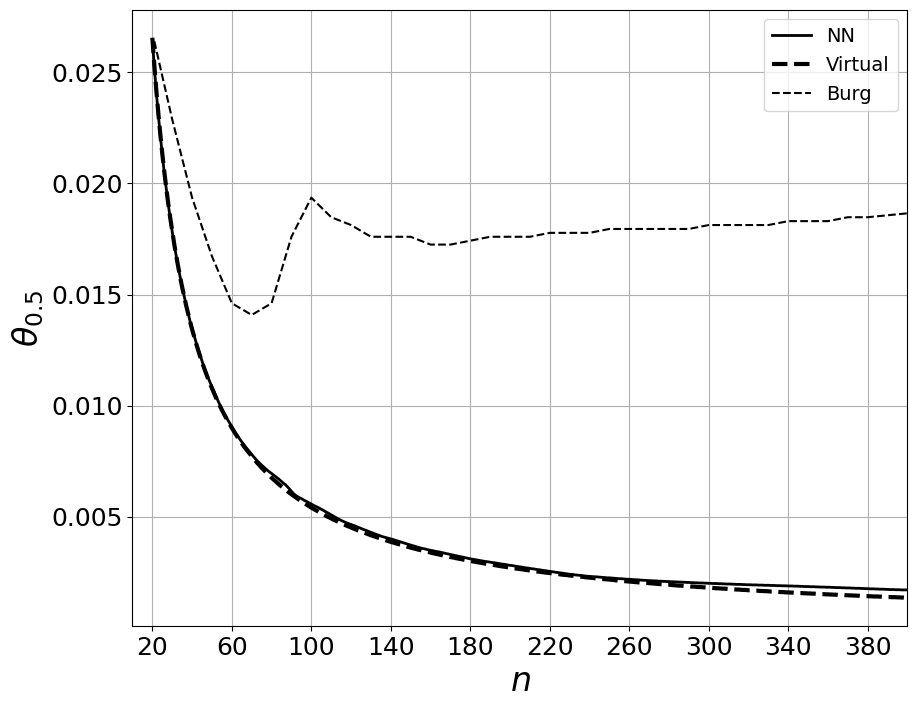

In [62]:
qp_df = pd.read_csv("../sheets_output/qp_nn.csv")
qp_df_subset = qp_df.query("n >= 20")

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(qp_df_subset["n"], qp_df_subset["qp_nn"], c = "#000000", linewidth = 2, label = "NN")
plt.plot(qp_df_subset["n"], qp_df_subset["qp_virtual"], c = "#000000", linewidth = 3, linestyle = "--", label = "Virtual")
plt.plot(berg_df["n"], berg_df["Theta_p"] * 1.76, c = "#000000", label = "Burg", linestyle = "--")
plt.legend(fontsize = 14)
plt.xlim((10, 400))
plt.xticks([])
plt.xticks(np.arange(20, 400, 40), np.arange(20, 400, 40))
plt.ylabel(r"$\theta_{0.5}$", fontsize = 24)
plt.xlabel(r"$n$", fontsize = 24)
plt.grid()
plt.savefig("../latex/images/berg_NN_theta_compare.png", bbox_inches='tight')

## Сравнение модели нейросети и модели Берга на симметричных целях

### 0.010

In [63]:
targets = [-0.021 * 0.5, 0.021 * 0.5]

n_real = np.arange(-K, K + 1)                 # Реальное перечисление номеров излучателей
n_virtual = np.arange(-NP, NP + 1)            # Идеальное (виртуальное) число излучателей

Cn_real = Cn_deltaf_compute(n_real, k, d, targets)              # Реальные Cn излучателей от -K до K включительно
Cn_virtual = Cn_deltaf_compute(n_virtual, k, d, targets)        # Виртуальные Cn излучателей (как хотим чтобы было)

Cn_nn = model_superresolution_real(torch.tensor(np.real(Cn_real), dtype = torch.float)).detach() + 1j * model_superresolution_imag(torch.tensor(np.imag(Cn_real), dtype = torch.float)).detach()

In [64]:
berg_csv = np.array(pd.read_csv("../sheets_output/Berg_010.txt.txt", header=None).iloc[:400,0]) * 0.5
Cn_berg = np.append(berg_csv[-1:-NP:-1], berg_csv)

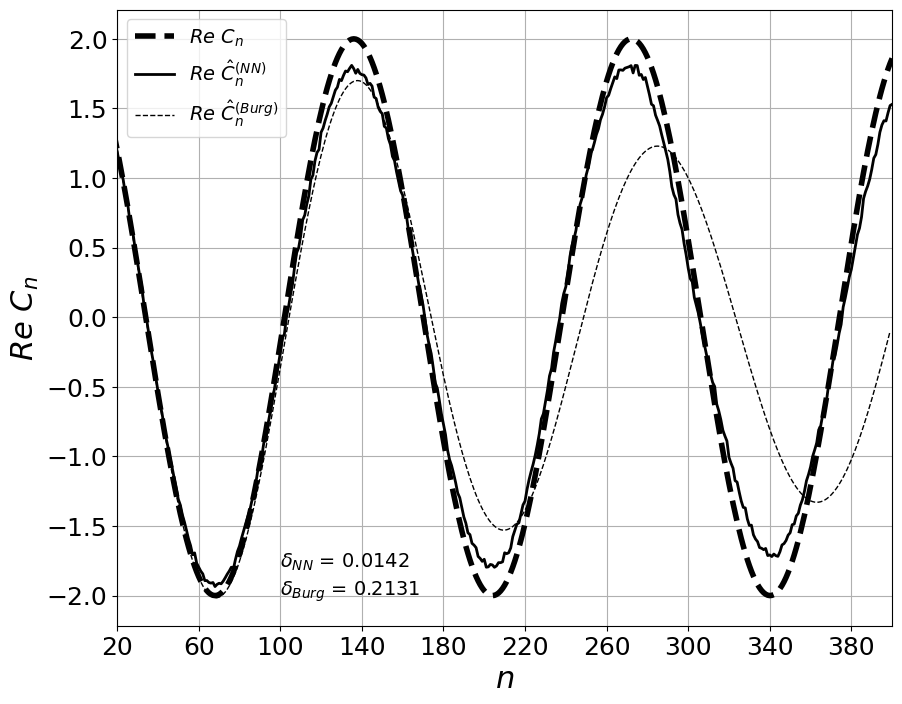

In [66]:
d41 = np.sum((np.real(Cn_virtual) - np.real(np.array(Cn_nn))) ** 2) / n_virtual.shape[0]
D41 = np.sum((np.real(Cn_virtual)[NP + K + 1:NP * 2 + 1] - 
              np.real(np.array(Cn_nn))[NP + K + 1:NP * 2 + 1]) ** 2) / np.sum((np.real(Cn_virtual)[NP + K + 1:NP * 2 + 1]) ** 2)

D41_berg = (np.sum((np.real(Cn_virtual)[K:NP+1] - 
                    np.real(np.array(Cn_berg)[K:NP+1])) ** 2) / 
            np.sum((np.real(Cn_virtual)[K:NP+1]) ** 2))

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(n_virtual, np.real(Cn_virtual), label = "$Re\ C_{n}$", linewidth = 4, c = "#000000", linestyle = "--")
plt.plot(n_virtual, np.real(Cn_nn), label = "$Re\ \hat{C}_{n}^{(NN)}$", linestyle = "-", c = "#000000", linewidth = 2)
plt.plot(np.arange(20, 400), berg_csv[20:], label = "$Re\ \hat{C}_{n}^{(Burg)}$", linestyle = "--", c = "#000000", linewidth = 1)
plt.xlim((20, 400))
plt.xticks([])
plt.xticks(np.arange(20, 400, 40), np.arange(20, 400, 40))
plt.legend(fontsize = 14)
plt.grid()
plt.text(100,
         -1.8,
         "$\delta_{NN}$ = %.4f" % D41,
        fontsize = 14)
plt.text(100,
         -2,
         "$\delta_{Burg}$ = %.4f" % D41_berg,
        fontsize = 14)
plt.xlabel(r"$n$", fontsize = 22)
plt.ylabel(r"$Re\ C_n$", fontsize = 22)
plt.savefig("../rmarkdown_report/Burg_NN_compare_1_real_bw.png")
plt.savefig("../latex/images/Burg_NN_compare_1_real_bw.png", bbox_inches='tight')

In [67]:
# Для отрисовки целей
signals = signal_gauss(alpha, alpha0 = targets, scale = 0.00000005, amp = amplitude)

# Реально принятый сигнал
U_real = U_compute(alpha, Cn_real, k, d)

# Как должно быть по факту
U_virtual = U_compute(alpha, Cn_virtual, k, d)

# Принятый сигнал виртуальной системой
U_nn = U_compute(alpha, Cn_nn, k, d)

# Принятый сигнал Берг
U_berg = U_compute(alpha, Cn_berg, k, d)

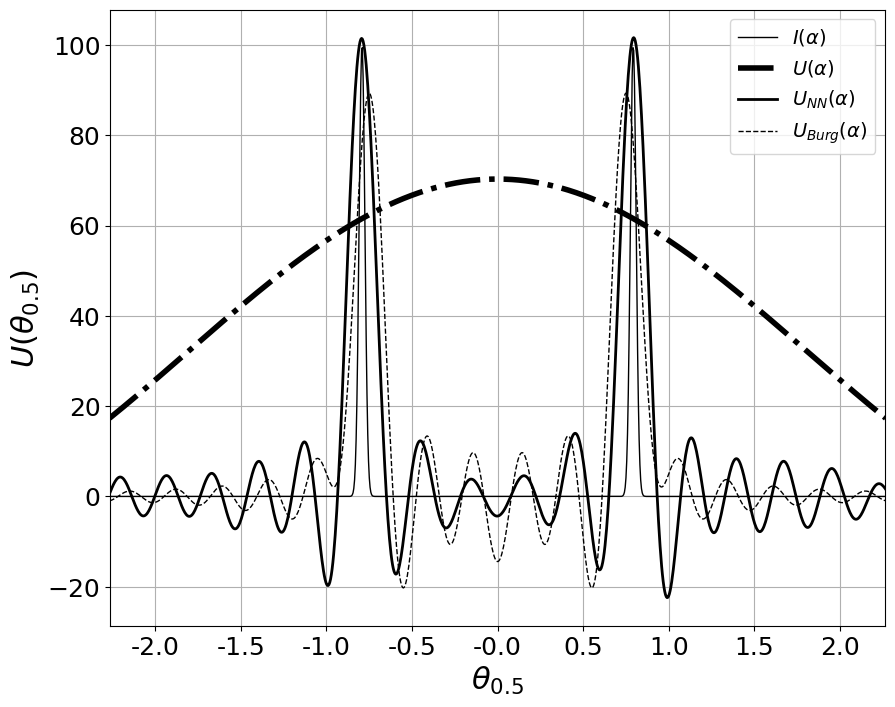

In [68]:
theta_05 = 0.0265

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(alpha, signals * 1/3, label = r"$I(\alpha)$", c = "#000000", linewidth = 1, linestyle = "-")
plt.plot(alpha, np.real(U_real), label = r"$U(\alpha)$", c = "#000000", linewidth = 4, linestyle = "-.")
#plt.plot(alpha, np.real(U_virtual), label = "Принятый сигнал, виртуальная система", c = "#000000", linewidth = 2, linestyle = "--")
plt.plot(alpha, np.real(U_nn) * 1/7, label = r"$U_{NN}(\alpha)$", c = "#000000", linewidth = 2)
plt.plot(alpha, np.real(U_berg) * 1/7, label = r"$U_{Burg}(\alpha)$", c = "#000000", linewidth = 1, linestyle = "--")
plt.xlim((-0.03, 0.03))
plt.xticks([])
plt.xticks(np.arange(-theta_05, theta_05+0.001, theta_05/4), np.round(np.arange(-theta_05, theta_05+0.001, theta_05/4) / 
                                                                      (theta_05/2), 3))
plt.legend(fontsize = 14)
plt.grid()
plt.xlabel(r"$\theta_{0.5}$", fontsize = 22)
plt.ylabel(r"$U(\theta_{0.5})$", fontsize = 22)
plt.savefig("../rmarkdown_report/Burg_NN_compare_1_bw.png")
plt.savefig("../latex/images/Burg_NN_compare_1_bw.png", bbox_inches='tight')

### 0.0083

In [69]:
targets = [-0.021 * 0.4, 0.021 * 0.4]

n_real = np.arange(-K, K + 1)                 # Реальное перечисление номеров излучателей
n_virtual = np.arange(-NP, NP + 1)            # Идеальное (виртуальное) число излучателей

Cn_real = Cn_deltaf_compute(n_real, k, d, targets)              # Реальные Cn излучателей от -K до K включительно
Cn_virtual = Cn_deltaf_compute(n_virtual, k, d, targets)        # Виртуальные Cn излучателей (как хотим чтобы было)

Cn_nn = model_superresolution_real(torch.tensor(np.real(Cn_real), dtype = torch.float)).detach() + 1j * model_superresolution_imag(torch.tensor(np.imag(Cn_real), dtype = torch.float)).detach()

In [70]:
berg_csv = np.array(pd.read_csv("../sheets_output/Berg_008.txt.txt", header=None).iloc[:400,0]) * 0.5
Cn_berg = np.append(berg_csv[-1:-NP:-1], berg_csv)

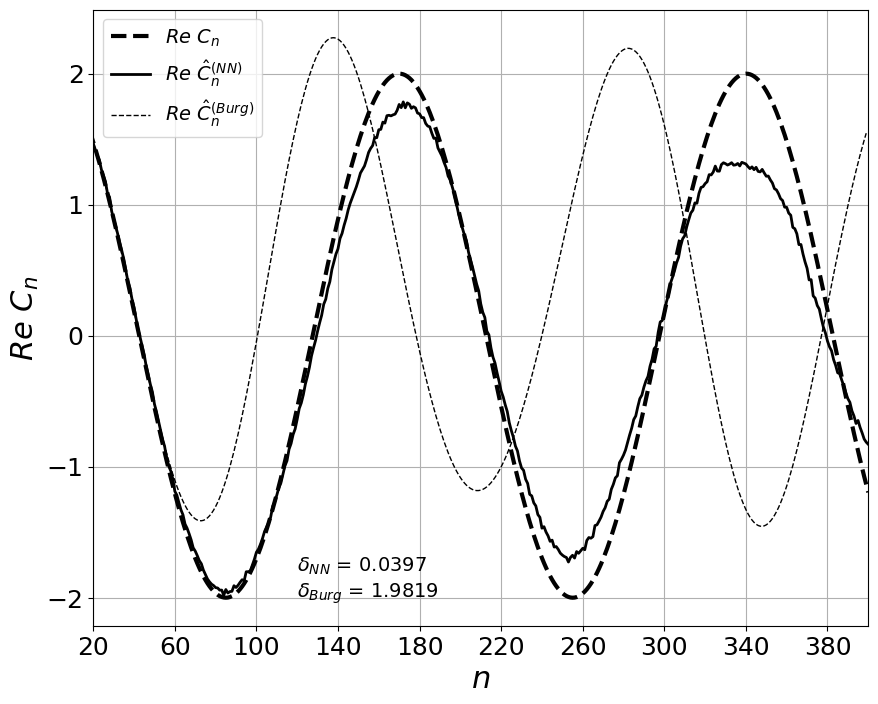

In [71]:
d51 = np.sum((np.real(Cn_virtual) - np.real(np.array(Cn_nn))) ** 2) / n_virtual.shape[0]
D51 = np.sum((np.real(Cn_virtual)[NP + K + 1:NP * 2 + 1] - 
              np.real(np.array(Cn_nn))[NP + K + 1:NP * 2 + 1]) ** 2) / np.sum((np.real(Cn_virtual)[NP + K + 1:NP * 2 + 1]) ** 2)

D51_berg = (np.sum((np.real(Cn_virtual)[len(Cn_berg)-380:len(Cn_berg)] - 
                    np.real(np.array(Cn_berg)[len(Cn_berg)-380:len(Cn_berg)])) ** 2) / 
            np.sum((np.real(Cn_virtual)[len(Cn_berg)-380:len(Cn_berg)]) ** 2))

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(n_virtual, np.real(Cn_virtual), label = "$Re\ C_{n}$", linewidth = 3, c = "#000000", linestyle = "--")
plt.plot(n_virtual, np.real(Cn_nn), label = "$Re\ \hat{C}_{n}^{(NN)}$", linestyle = "-", c = "#000000", linewidth = 2)
plt.plot(np.arange(20, 400), berg_csv[20:], label = "$Re\ \hat{C}_{n}^{(Burg)}$", linestyle = "--", c = "#000000", linewidth = 1)
plt.xlim((20, 400))
plt.xticks([])
plt.xticks(np.arange(20, 400, 40), np.arange(20, 400, 40))
plt.legend(fontsize = 14)
plt.grid()
plt.text(120,
         -1.8,
         "$\delta_{NN}$ = %.4f" % D51,
        fontsize = 14)
plt.text(120,
         -2,
         "$\delta_{Burg}$ = %.4f" % D51_berg,
        fontsize = 14)
plt.xlabel(r"$n$", fontsize = 22)
plt.ylabel(r"$Re\ C_n$", fontsize = 22)
plt.savefig("../latex/images/Burg_NN_compare_2_real_bw.png", bbox_inches='tight')

In [72]:
# Для отрисовки целей
signals = signal_gauss(alpha, alpha0 = targets, scale = 0.00000005, amp = amplitude)

# Реально принятый сигнал
U_real = U_compute(alpha, Cn_real, k, d)

# Как должно быть по факту
U_virtual = U_compute(alpha, Cn_virtual, k, d)

# Принятый сигнал виртуальной системой
U_nn = U_compute(alpha, Cn_nn, k, d)

# Принятый сигнал Берг
U_berg = U_compute(alpha, Cn_berg, k, d)

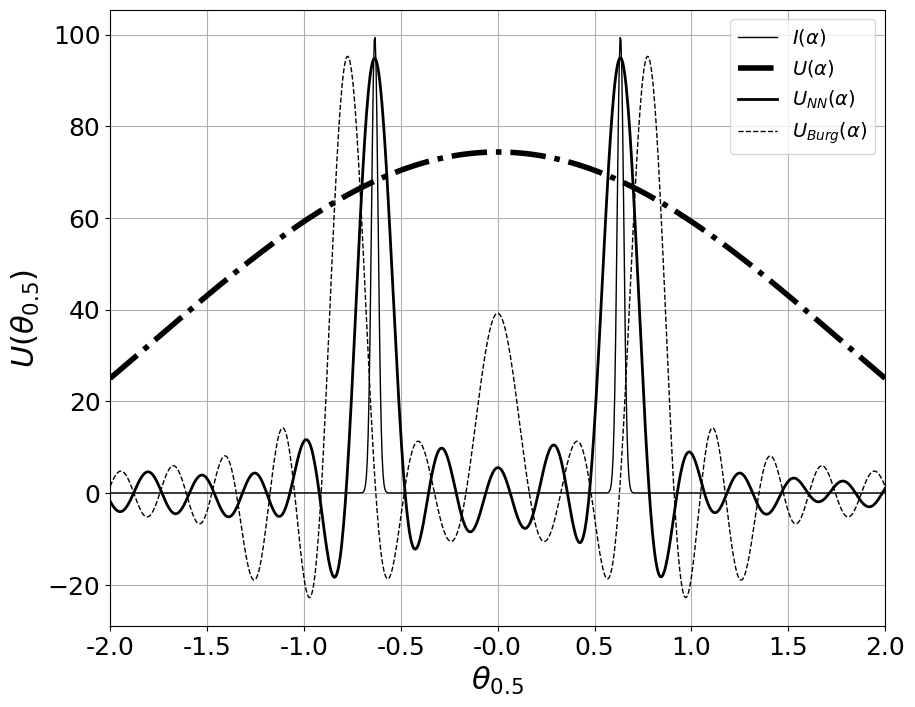

In [73]:
theta_05 = 0.0265

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(alpha, signals * 1/3, label = r"$I(\alpha)$", c = "#000000", linewidth = 1, linestyle = "-")
plt.plot(alpha, np.real(U_real), label = r"$U(\alpha)$", c = "#000000", linewidth = 4, linestyle = "-.")
#plt.plot(alpha, np.real(U_virtual), label = "Принятый сигнал, виртуальная система", c = "#000000", linewidth = 2, linestyle = "--")
plt.plot(alpha, np.real(U_nn) * 1/7, label = r"$U_{NN}(\alpha)$", c = "#000000", linewidth = 2)
plt.plot(alpha, np.real(U_berg) * 1/7, label = r"$U_{Burg}(\alpha)$", c = "#000000", linewidth = 1, linestyle = "--")
plt.xlim((-0.026, 0.026))
plt.xticks([])
plt.xticks(np.arange(-theta_05, theta_05+0.001, theta_05/4), np.round(np.arange(-theta_05, theta_05+0.001, theta_05/4) / (theta_05/2), 2))
plt.legend(fontsize = 14)
plt.grid()
plt.xlabel(r"$\theta_{0.5}$", fontsize = 22)
plt.ylabel(r"$U(\theta_{0.5})$", fontsize = 22)
plt.savefig("../latex/images/Burg_NN_compare_2_bw.png", bbox_inches='tight')

### 0.0065

In [74]:
targets = [-0.021 * 0.3, 0.021 * 0.3]

n_real = np.arange(-K, K + 1)                 # Реальное перечисление номеров излучателей
n_virtual = np.arange(-NP, NP + 1)            # Идеальное (виртуальное) число излучателей

Cn_real = Cn_deltaf_compute(n_real, k, d, targets)              # Реальные Cn излучателей от -K до K включительно
Cn_virtual = Cn_deltaf_compute(n_virtual, k, d, targets)        # Виртуальные Cn излучателей (как хотим чтобы было)

Cn_nn = model_superresolution_real(torch.tensor(np.real(Cn_real), dtype = torch.float)).detach() + \
        1j * model_superresolution_imag(torch.tensor(np.imag(Cn_real), dtype = torch.float)).detach()

In [75]:
berg_csv = np.array(pd.read_csv("../sheets_output/Berg_006.txt.txt", header=None).iloc[:400,0]) * 0.5
Cn_berg = np.append(berg_csv[-1:-NP:-1], berg_csv)

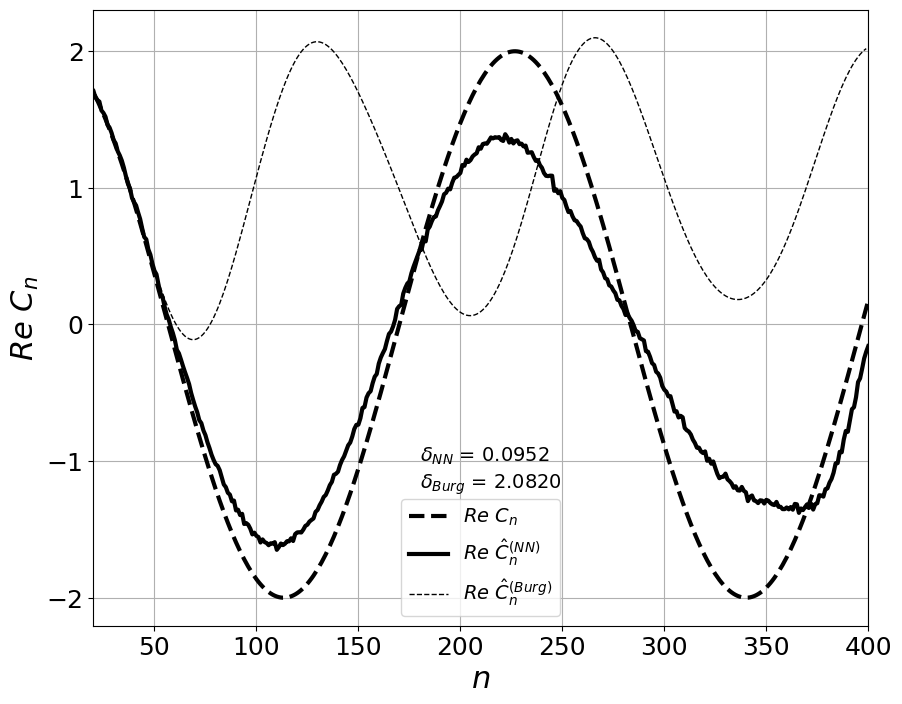

In [77]:
d61 = np.sum((np.real(Cn_virtual) - np.real(np.array(Cn_nn))) ** 2) / n_virtual.shape[0]
D61 = np.sum((np.real(Cn_virtual)[NP + K + 1:NP * 2 + 1] - 
              np.real(np.array(Cn_nn))[NP + K + 1:NP * 2 + 1]) ** 2) / np.sum((np.real(Cn_virtual)[NP + K + 1:NP * 2 + 1]) ** 2)

D61_berg = (np.sum((np.real(Cn_virtual)[len(Cn_berg)-380:len(Cn_berg)] - 
                    np.real(np.array(Cn_berg)[len(Cn_berg)-380:len(Cn_berg)])) ** 2) / 
            np.sum((np.real(Cn_virtual)[len(Cn_berg)-380:len(Cn_berg)]) ** 2))

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(n_virtual, np.real(Cn_virtual), label = "$Re\ C_{n}$", linewidth = 3, c = "#000000", linestyle = "--")
plt.plot(n_virtual, np.real(Cn_nn), label = "$Re\ \hat{C}_{n}^{(NN)}$", linestyle = "-", c = "#000000", linewidth = 3)
plt.plot(np.arange(20, 400), berg_csv[20:], label = "$Re\ \hat{C}_{n}^{(Burg)}$", linestyle = "--", c = "#000000", linewidth = 1)
plt.xlim((20, 400))
plt.legend(fontsize = 14)
plt.grid()
plt.text(180,
         -1,
         "$\delta_{NN}$ = %.4f" % D61,
        fontsize = 14)
plt.text(180,
         -1.2,
         "$\delta_{Burg}$ = %.4f" % D61_berg,
        fontsize = 14)
plt.xlabel(r"$n$", fontsize = 22)
plt.ylabel(r"$Re\ C_n$", fontsize = 22)
plt.savefig("../latex/images/Burg_NN_compare_3_real_bw.png", bbox_inches='tight')

In [78]:
# Для отрисовки целей
signals = signal_gauss(alpha, alpha0 = targets, scale = 0.00000005, amp = amplitude)

# Реально принятый сигнал
U_real = U_compute(alpha, Cn_real, k, d)

# Как должно быть по факту
U_virtual = U_compute(alpha, Cn_virtual, k, d)

# Принятый сигнал виртуальной системой
U_nn = U_compute(alpha, Cn_nn, k, d)

# Принятый сигнал Берг
U_berg = U_compute(alpha, Cn_berg, k, d)

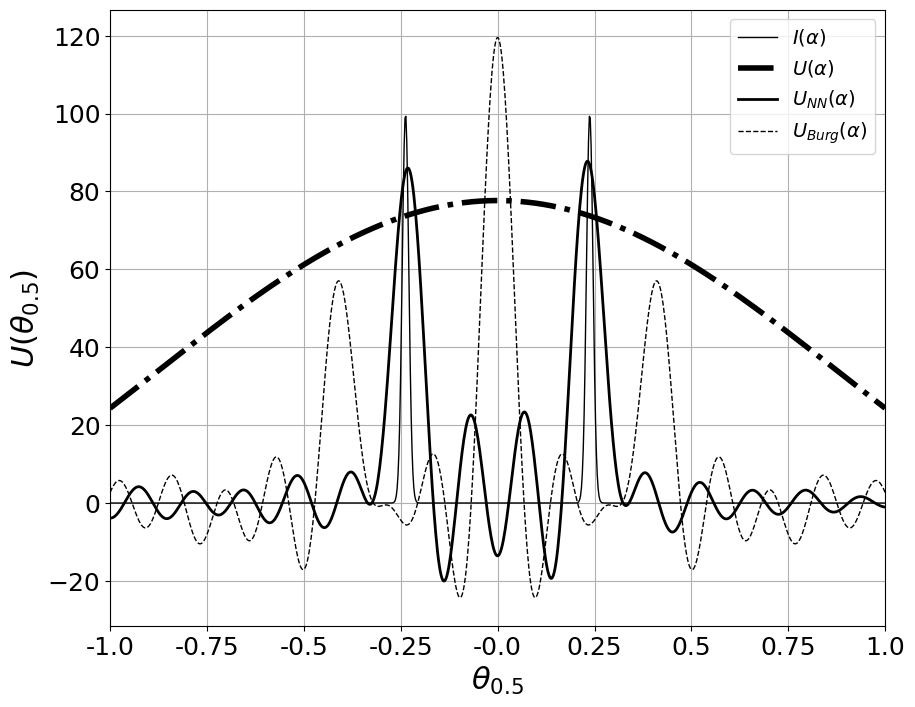

In [79]:
theta_05 = 0.0265

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(alpha, signals * 1/3, label = r"$I(\alpha)$", c = "#000000", linewidth = 1, linestyle = "-")
plt.plot(alpha, np.real(U_real), label = r"$U(\alpha)$", c = "#000000", linewidth = 4, linestyle = "-.")
#plt.plot(alpha, np.real(U_virtual), label = "Принятый сигнал, виртуальная система", c = "#000000", linewidth = 2, linestyle = "--")
plt.plot(alpha, np.real(U_nn) * 1/7, label = r"$U_{NN}(\alpha)$", c = "#000000", linewidth = 2)
plt.plot(alpha, np.real(U_berg) * 1/7, label = r"$U_{Burg}(\alpha)$", c = "#000000", linewidth = 1, linestyle = "--")
plt.xlim((-0.02, 0.02))
plt.xticks([])
plt.xticks(np.arange(-theta_05, theta_05 + 0.001, theta_05/4), np.round(np.arange(-theta_05, theta_05 + 0.001, theta_05/4) /
                                                                        (theta_05), 2))
plt.legend(fontsize = 14)
plt.grid()
plt.xlabel(r"$\theta_{0.5}$", fontsize = 22)
plt.ylabel(r"$U(\theta_{0.5})$", fontsize = 22)
plt.savefig("../latex/images/Burg_NN_compare_3_bw.png", bbox_inches='tight')

1. Bhaskar D., Rao B. D., Hari K.V.S. Performance analysis of ROOT – MUSIC // IEEE Trans. on Acoustics, Speech, and Signal Processing. 1989. Vol. ASSP – 37, pp. 1939-1949.

2. Cetin M., Karl W. Feature-enhanced synthetic aperture radar image formation based on nonquadratic regularization // IEEE Trans. Image Processing. 2001. Vol. 10, №. 4, pp. 623–631.

3. Quinquis A., Radoi E., Totir F. Some radar imagery results using superresolution techniques // IEEE Trans. Antennas and Propagation. 2004.Vol. 52, № 5, pp. 1230-1244, 

4. Changyin S, Zheng B.  Super-resolution algorithm for instantaneous ISAR imaging // Electron. Letters. 2000. 36, № 3, pp. 253-255.

5. М.В. Ратынский. Адаптация и сверхразрешение абыстродействующих антенных решетках. Радио и связ,М  2003 г. с.199.

6. Herman M. A., Strohmer T. High-resolution radar via compressed sensing //  IEEE Trans. Signal Processing. 2009. Vol. 57, № 6, pp. 2275–2284.

7. Lagovsky B.А. Image Restoration of the Objects with Superresolution on the Basis of Spline – Interpolation //  Progress In Electromagnetics Research Symposium (PIERS 2012-Moscow), PIERS Proceedings 2012. pp. 989 – 992.

8. Лаговский Б.А., Самохин А.Б. Алгебраические методы восстановления изображения источников радиоизлучения с повышенным угловым разрешением //  Электромагнитные волны и электронные  системы.  2009, № 9, т.14,  с. 7-18.

9. Лаговский Б.А. Методы повышения эффективного углового  разрешения малоразмерных целей в задачах радионавигации  и  радиолокации.  // Антенны. 2007,  № 9(124),  с. 50 -55.

10. Лаговский Б.А. Восстановление изображения групповой цели цифровыми антенными решетками // Антенны. 2011. № 2(165), с. 40 -46.

11. Лаговский Б.А., Рубинович Е.Я. Алгоритмы цифровой обработки данных измерений, обеспечивающие угловое сверхразрешение. Мехатроника, автоматизация, управление. 2021;22(7):349-356. https://doi.org/10.17587/mau.22.349-356

12. Тормозов, В. С. Настройка, обучение и тестирование нейронной сети долгой краткосрочной памяти для задачи распознавания образов / В. С. Тормозов, А. Л. Золкин, К. А. Василенко // Промышленные АСУ и контроллеры. – 2020. – № 3. – С. 52-57. – DOI 10.25791/asu.3.2020.1171. – EDN JJWSSG.

13. Минаев Е. Ю., Кутикова В. В., Никоноров А. В. Трекинг объектов в видеопотоке на основе сверточных нейронных сетей и фрактального анализа //Сборник трудов IV международной конференции и молодежной школы «Информационные технологии и нанотехнологии»(ИТНТ-2018)-Самара: Новая техника. – 2018. – С. 2792-2798.

14. Козар Б. А., Кугуракова В. В., Сахибгареева Г. Ф. Структуризация сущностей естественного текста с использованием нейронных сетей для генерации трехмерных сцен //Программные продукты и системы. – 2022. – Т. 35. – №. 3. – С. 329-339.

15. Семенюк В. В., Складчиков М. В. Разработка алгоритма распознавания эмоций человека с использованием сверточной нейронной сети на основе аудиоданных //Информатика. – 2022. – Т. 19. – №. 4.

16. Яшин В. И. РАСТУЩИЕ НЕЙРОННЫЕ СЕТИ В РОБОТОТЕХНИКЕ //Роботизация Вооружённых Сил Российской Федерации. – 2020. – С. 279-284.

17. Ахтёров А. В., Кирильченко А. А. Основы теоретической робототехники. Искусственные нейронные сети.(Обзор) //Препринты Института прикладной математики им. МВ Келдыша РАН. – 2008. – №. 0. – С. 2-20.

18. Сукина С. А. Нейронные сети //Новая наука: стратегии и векторы развития. – 2016. – №. 5 (82). – С. 248.

19. Ямашкин А. А., Ямашкин С. А. Использование нейронных сетей прямого распространения для ландшафтного картографирования на базе космических снимков //Геодезия и картография. – 2014. – №. 11. – С. 52-58.

20. Иванько А. Ф., Иванько М. А., Сизова Ю. А. Нейронные сети: общие технологические характеристики //Научное обозрение. Технические науки. – 2019. – №. 2. – С. 17-23.

21. Дычков И. Н. Сверточные нейронные сети //Тенденции развития науки и образования. – 2021. – №. 73-1. – С. 38-41.

## SELU функция активации

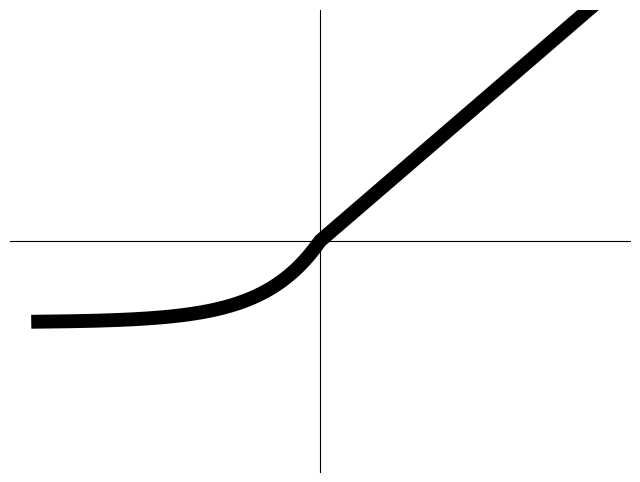

In [33]:
scale = 1.0507009873554804934193349852946
alpha = 1.6732632423544

x_grid = np.linspace(-5, 5, 10000)
zeros = np.zeros(10000)

SELU = lambda x: scale * (np.maximum(zeros, x) + np.minimum(zeros, alpha * (np.exp(x) - 1)))

plt.figure(figsize = (8,6), dpi = 100)
plt.plot(x_grid, SELU(x_grid),c="#000000", linewidth = 10)
plt.ylim((-5, 5))
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.savefig("SELU.svg")

## Linear

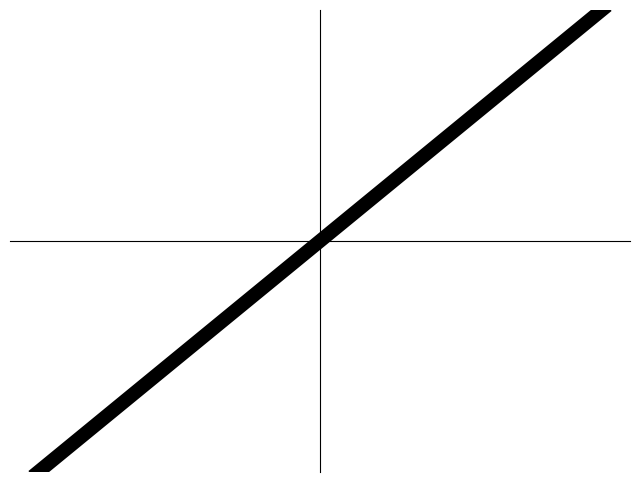

In [32]:
x_grid = np.linspace(-5, 5, 10000)


plt.figure(figsize = (8,6), dpi = 100)
plt.plot(x_grid, x_grid, c="#000000", linewidth = 10)
plt.ylim((-5, 5))
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.savefig("Linear.svg")